# Wheat prices in Madhaya Pradesh

In [30]:
# This is the arima model implementation in the madhya pradesh
# Import libraries
import warnings
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Defaults
plt.rcParams['figure.figsize'] = (20.0, 10.0)
plt.rcParams.update({'font.size': 12})
plt.style.use('ggplot')

<class 'pandas.core.frame.DataFrame'>
                     state   district     market commodity      variety  \
Date                                                                      
2023-02-19  Madhya Pradesh  Alirajpur  Alirajpur     Wheat  147 Average   
2023-01-02  Madhya Pradesh  Alirajpur  Alirajpur     Wheat        Other   
2023-01-04  Madhya Pradesh  Alirajpur  Alirajpur     Wheat        Other   
2023-01-05  Madhya Pradesh  Alirajpur  Alirajpur     Wheat        Other   
2023-01-06  Madhya Pradesh  Alirajpur  Alirajpur     Wheat        Other   
...                    ...        ...        ...       ...          ...   
2023-10-04  Madhya Pradesh  Alirajpur      Jobat     Wheat        Other   
2023-10-05  Madhya Pradesh  Alirajpur      Jobat     Wheat        Other   
2023-10-08  Madhya Pradesh  Alirajpur      Jobat     Wheat        Other   
2023-10-09  Madhya Pradesh  Alirajpur      Jobat     Wheat        Other   
2023-10-10  Madhya Pradesh  Alirajpur      Jobat     Wheat    

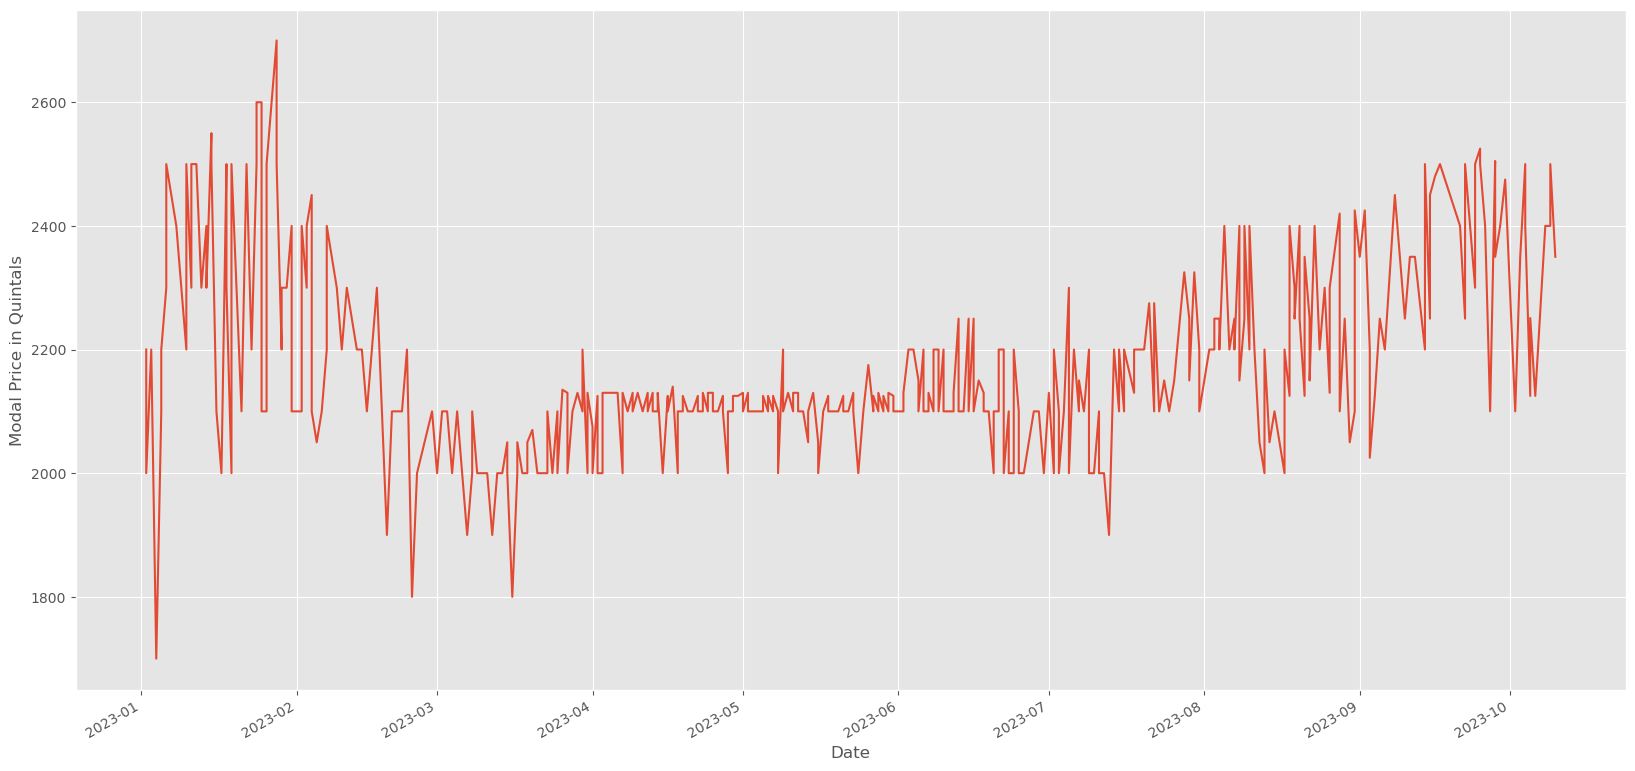

<class 'list'>


In [31]:
data = pd.read_csv('/run/media/rishabh/New Volume/projects/wheat-price-predictor/Data/Proper/MP_Alirajpur_2023.csv',engine='python')
print(type(data))
#changing column name
c_names = data.columns.tolist()
c_names[c_names.index('arrival_date')] = 'Date'
data.columns=c_names


#converting the column to datetime value
data['Date'] = pd.to_datetime(data['Date'],format="%d/%m/%Y")
#print(data)
data.set_index(['Date'],inplace=True)
print(data)
data['modal_price'].plot()
plt.ylabel('Modal Price in Quintals')
plt.xlabel('Date')
plt.show()
# Removing the other colunms for clarity
print(type(c_names))

#print(data.describe())
#for i in c_names:
#    del data[i]

In [71]:
# for item in c_names[:]:  
#     if item == 'modal_price' or item == 'Date':
#         continue
#     else:
#         del data[item]  

#print(c_names)
#print(data.columns.tolist())
 
#print(data)
#print(data.columns.tolist())
#print(data.sort_index())
data_noduplicate = data[data.index.duplicated(keep='first')]
data_cp = data_noduplicate.sort_index()
print("No duplicates")
#print(data_noduplicate)
#print(data_cp)

# del data['state']
# del data['district']
# del data['market']
# del data['commodity']
# del data['variety']
# del data['min_price']
# del data['max_price']
# del data['update_date']
data




No duplicates


,modal_price
Date,
2023-02-19,1900
2023-01-02,2000
2023-01-04,1700
2023-01-05,2100
2023-01-06,2300
...,...
2023-10-04,2500
2023-10-05,2251
2023-10-08,2400


# ARIMA

In [36]:

# Define the d and q parameters to take any value between 0 and 1
q = d = range(0, 2)
# Define the p parameters to take any value between 0 and 3
p = range(0, 4)

# Generate all different combinations of p,d and q triplets
pdq = list(itertools.product(p,d,q))

seasonal_pdq = [(x[0],x[1],x[2],12) for x in list(itertools.product(p,d,q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))




Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [76]:
train_data = data['2023-01-02':'2023-09-03']
test_data = data['2023-09-04':'2023-10-10']

print("Hello world")
train_data
#test_data

Hello world


,modal_price
Date,
2023-02-19,1900
2023-01-02,2000
2023-01-04,1700
2023-01-05,2100
2023-01-06,2300
...,...
2023-08-26,2300
2023-08-28,2100
2023-08-31,2425


In [77]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

AIC = []
SARIMAX_model = []
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(train_data,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('SARIMAX{}x{} - AIC:{}'.format(param, param_seasonal, results.aic), end='\r')
            AIC.append(results.aic)
            SARIMAX_model.append([param, param_seasonal])
        except:
            continue


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.06793D+00    |proj g|=  2.88125D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      0      1      0     0     0   2.881D-07   9.068D+00
  F =   9.0679331851756970     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE, 12) - AIC:6458.368427845096

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bound

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  8.21342D+00    |proj g|=  3.24934D-01

At iterate   20    f=  8.14904D+00    |proj g|=  4.76417D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     21     33      1     0     0   2.870D-06   8.149D+00
  F =   8.1490427749229433     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE, 12) - AIC:5806.118455745136

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.19651D+00    |proj g|=  1.09219D-04

           * * *

Tit   = total number o

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      1     14      1     0     0   9.694D-04   6.223D+00
  F =   6.2229639900734952     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE, 12) - AIC:4434.7503609323285

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.14485D+00    |proj g|=  9.24351D-01

At iterate    5    f=  6.14452D+00    |proj g|=  1.84620D-01

At iterate   10    f=  6.14433D+00    |proj g|=  2.84428D-02

           * * *

Tit   = total number 

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  5.89084D+00    |proj g|=  2.24259D-03

At iterate   10    f=  5.88962D+00    |proj g|=  8.60956D-03

At iterate   15    f=  5.88949D+00    |proj g|=  2.37899D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     15     21      1     0     0   2.379D-06   5.889D+00
  F =   5.8894890722205044     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE, 12) - AIC:4199.316219420999

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.93457D+00    |p

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE, 12) - AIC:4231.416583380582

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.91834D+00    |proj g|=  1.52985D+00

At iterate    5    f=  5.88422D+00    |proj g|=  6.68428D+00

At iterate   10    f=  5.87224D+00    |proj g|=  2.58570D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     11     34      1     0     0   2.586D-02   5.872D+00
  F =   5.8722413770750475     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.67562D+00    |proj g|=  5.59961D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      0      1      0     0     0   5.600D-06   5.676D+00
  F =   5.6756182118450109     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE, 12) - AIC:4047.0401668336476

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the boun

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


RUNNING THE L-BFGS-B CODE, 12) - AIC:4048.985210501898

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.66858D+00    |proj g|=  2.12265D+00


 This problem is unconstrained.



At iterate    5    f=  5.65780D+00    |proj g|=  2.76684D+00

At iterate   10    f=  5.64998D+00    |proj g|=  6.99544D-02

At iterate   15    f=  5.64096D+00    |proj g|=  1.08157D+00

At iterate   20    f=  5.62068D+00    |proj g|=  7.01822D-01

At iterate   25    f=  5.62058D+00    |proj g|=  3.91815D-01

At iterate   30    f=  5.61507D+00    |proj g|=  5.25973D+00

At iterate   35    f=  5.60944D+00    |proj g|=  4.99490D-01



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     37     56      1     0     0   9.542D-03   5.609D+00
  F =   5.6094262509241286     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE, 12) - AIC:4003.91149065798

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.42765D+00    |proj g|=  5.97113D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Sk

 This problem is unconstrained.



At iterate    5    f=  5.40706D+00    |proj g|=  1.85078D-01

At iterate   10    f=  5.39311D+00    |proj g|=  1.13657D-03

At iterate   15    f=  5.39308D+00    |proj g|=  4.93086D-03

At iterate   20    f=  5.39110D+00    |proj g|=  2.76762D-02

At iterate   25    f=  5.39026D+00    |proj g|=  5.53811D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     26     35      1     0     0   1.859D-05   5.390D+00
  F =   5.3902583408555458     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE, 12) - AIC:3847.8639386891487

           * * *

Machine precision = 2.220D-16
 N =    

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  8.30601D+00    |proj g|=  5.83956D-03

At iterate   20    f=  8.29578D+00    |proj g|=  5.11309D-02

At iterate   25    f=  7.81566D+00    |proj g|=  7.53422D-01

At iterate   30    f=  7.60294D+00    |proj g|=  3.47231D-01

At iterate   35    f=  7.58759D+00    |proj g|=  5.73367D-02

At iterate   40    f=  7.58737D+00    |proj g|=  1.18192D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     40     53      1     0     0   1.182D-05   7.587D+00
  F =   7.5873692461872233     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE, 12) - AIC:5408.206903285

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  5.77527D+00    |proj g|=  7.49487D-02

At iterate   15    f=  5.76207D+00    |proj g|=  1.02142D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     17     20      1     0     0   1.231D-06   5.762D+00
  F =   5.7620664631240119     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE, 12) - AIC:4108.591321744297

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.30629D+00    |proj g|=  2.79837D-03

At iterate    5    f=  8.30591D+00    |p

 This problem is unconstrained.



At iterate   15    f=  7.67547D+00    |proj g|=  2.54897D+00

At iterate   20    f=  6.48495D+00    |proj g|=  2.66615D+00

At iterate   25    f=  6.16123D+00    |proj g|=  2.08488D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     29     60      1     0     0   1.123D-04   6.161D+00
  F =   6.1606600044163189     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE, 12) - AIC:4392.389923144419

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.26186D+00    |p

 This problem is unconstrained.



At iterate   20    f=  7.35710D+00    |proj g|=  9.86206D+00

At iterate   25    f=  6.49988D+00    |proj g|=  1.48018D+01

At iterate   30    f=  6.03024D+00    |proj g|=  2.83962D+00

At iterate   35    f=  6.01107D+00    |proj g|=  1.31303D-01

At iterate   40    f=  6.00456D+00    |proj g|=  2.21145D+00

At iterate   45    f=  5.99705D+00    |proj g|=  1.69797D-01

At iterate   50    f=  5.99640D+00    |proj g|=  4.41292D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     50     82      1     0     0   4.413D-03   5.996D+00
  F =   5.9964032163635776     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT       

 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     17     20      1     0     0   2.177D-06   5.848D+00
  F =   5.8481275060875522     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE, 12) - AIC:4169.866784334337

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.79876D+00    |proj g|=  8.63921D-02

At iterate    5    f=  5.78296D+00    |proj g|=  5.35968D-03

At iterate   10    f=  5.78259D+00    |proj g|=  1.66129D-02

At iterate   15    f=  5.76883D+00    |p

 This problem is unconstrained.



At iterate   20    f=  6.15126D+00    |proj g|=  4.00679D+00

At iterate   25    f=  5.85504D+00    |proj g|=  2.84519D-01

At iterate   30    f=  5.84970D+00    |proj g|=  5.33588D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     33     61      1     0     0   1.139D-04   5.850D+00
  F =   5.8497012930380459     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE, 12) - AIC:4172.987320643088

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.01919D+00    |p

 This problem is unconstrained.



At iterate    5    f=  8.01612D+00    |proj g|=  9.81197D-04

At iterate   10    f=  8.01562D+00    |proj g|=  1.85509D-03

At iterate   15    f=  8.01337D+00    |proj g|=  7.51088D-03

At iterate   20    f=  7.93597D+00    |proj g|=  8.24395D-02

At iterate   25    f=  6.63343D+00    |proj g|=  9.06975D-01

At iterate   30    f=  5.99342D+00    |proj g|=  1.72197D+00

At iterate   35    f=  5.82611D+00    |proj g|=  3.64705D-01

At iterate   40    f=  5.80396D+00    |proj g|=  8.47599D+00

At iterate   45    f=  5.77050D+00    |proj g|=  1.74971D+00

At iterate   50    f=  5.77028D+00    |proj g|=  4.82294D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  5.61664D+00    |proj g|=  1.63689D-03

At iterate   10    f=  5.61408D+00    |proj g|=  3.99492D-02

At iterate   15    f=  5.59826D+00    |proj g|=  3.05401D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     18     20      1     0     0   5.579D-06   5.598D+00
  F =   5.5982408467185669     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE, 12) - AIC:3993.94748286362

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.60129D+00    |pr

 This problem is unconstrained.



At iterate    5    f=  5.57847D+00    |proj g|=  3.92925D-02

At iterate   10    f=  5.57685D+00    |proj g|=  2.56109D-03

At iterate   15    f=  5.56921D+00    |proj g|=  6.23393D-02

At iterate   20    f=  5.53122D+00    |proj g|=  4.70572D-02

At iterate   25    f=  5.52994D+00    |proj g|=  2.43432D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     26     33      1     0     0   7.531D-06   5.530D+00
  F =   5.5299447904538432     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE, 12) - AIC:3947.320690803136

           * * *

Machine precision = 2.220D-16
 N =     

 This problem is unconstrained.



At iterate    5    f=  7.72600D+00    |proj g|=  4.16129D-04

At iterate   10    f=  7.71592D+00    |proj g|=  2.11808D-02

At iterate   15    f=  7.51492D+00    |proj g|=  1.59788D-01

At iterate   20    f=  6.68081D+00    |proj g|=  7.00742D-01

At iterate   25    f=  5.75087D+00    |proj g|=  1.24502D+00

At iterate   30    f=  5.60117D+00    |proj g|=  6.09832D-01

At iterate   35    f=  5.59850D+00    |proj g|=  2.45571D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     35     62      1     0     0   2.456D-05   5.599D+00
  F =   5.5985004532374791     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate    5    f=  7.72608D+00    |proj g|=  5.64686D-04

At iterate   10    f=  7.72562D+00    |proj g|=  7.68864D-04

At iterate   15    f=  7.72413D+00    |proj g|=  2.09510D-03

At iterate   20    f=  7.66865D+00    |proj g|=  8.39760D-02

At iterate   25    f=  7.20874D+00    |proj g|=  5.58632D-01

At iterate   30    f=  6.81001D+00    |proj g|=  2.03504D+00

At iterate   35    f=  5.74266D+00    |proj g|=  2.88818D+00

At iterate   40    f=  5.61768D+00    |proj g|=  7.65698D-01

At iterate   45    f=  5.58821D+00    |proj g|=  7.04500D-02

At iterate   50    f=  5.56049D+00    |proj g|=  2.59635D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   10    f=  5.38263D+00    |proj g|=  5.79972D-02

At iterate   15    f=  5.35974D+00    |proj g|=  1.10985D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     18     21      1     0     0   7.188D-06   5.360D+00
  F =   5.3597422685274578     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE, 12) - AIC:3826.1364951915502

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.38156D+00    |proj g|=  4.18104D-02


 This problem is unconstrained.



At iterate    5    f=  5.36675D+00    |proj g|=  4.20083D-02

At iterate   10    f=  5.36335D+00    |proj g|=  2.34769D-03

At iterate   15    f=  5.36027D+00    |proj g|=  2.47547D-02

At iterate   20    f=  5.31852D+00    |proj g|=  6.43165D-02

At iterate   25    f=  5.31509D+00    |proj g|=  1.33488D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     29     46      1     0     0   3.305D-05   5.315D+00
  F =   5.3150886438596618     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE, 12) - AIC:3796.343114428079

           * * *

Machine precision = 2.220D-16
 N =     

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


At iterate   10    f=  5.79381D+00    |proj g|=  6.15474D-02

At iterate   15    f=  5.78820D+00    |proj g|=  1.45004D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     15     17      1     0     0   1.450D-06   5.788D+00
  F =   5.7881959408587926     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE, 12) - AIC:4125.1955098914605

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.98020D+00    |proj g|=  5.17764D-06

           * * *

Tit   = total number o

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.89788D+00    |proj g|=  6.47091D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      0      1      0     0     0   6.471D-06   5.898D+00
  F =   5.8978774420920290     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE, 12) - AIC:4203.288738769525

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bound

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.70931D+00    |proj g|=  4.98952D-02

At iterate    5    f=  5.70799D+00    |proj g|=  9.79959D-03

At iterate   10    f=  5.70793D+00    |proj g|=  1.97092D-04

At iterate   15    f=  5.70790D+00    |proj g|=  4.05645D-03

At iterate   20    f=  5.70780D+00    |proj g|=  6.53440D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     22     26      1     0     0   8.480D-06   5.708D+00
  F =   5.7077994567387442     

CONVERG

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  5.58065D+00    |proj g|=  1.68495D-02

At iterate   10    f=  5.58040D+00    |proj g|=  9.17261D-04

At iterate   15    f=  5.57984D+00    |proj g|=  2.03296D-02

At iterate   20    f=  5.57038D+00    |proj g|=  6.42193D-02

At iterate   25    f=  5.56590D+00    |proj g|=  3.82088D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     27     34      1     0     0   3.275D-06   5.566D+00
  F =   5.5658989043964855     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE, 12) - AIC:3970.9200199302977

           * * *

Machine precision = 2.220D-16
 N =    

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE, 12) - AIC:3916.982656942116

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.49067D+00    |proj g|=  3.16762D-02

At iterate    5    f=  5.49011D+00    |proj g|=  3.06733D-03

At iterate   10    f=  5.49009D+00    |proj g|=  5.21787D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     10     14      1     0     0   5.218D-06   5.490D+00
  F =   5.4900920715131898     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE, 12) - AIC:3918

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.39199D+00    |proj g|=  2.48944D-02

At iterate    5    f=  5.35262D+00    |proj g|=  9.26386D-02

At iterate   10    f=  5.34530D+00    |proj g|=  2.42950D-03

At iterate   15    f=  5.34524D+00    |proj g|=  3.78252D-03

At iterate   20    f=  5.34182D+00    |proj g|=  5.10013D-02

At iterate   25    f=  5.33655D+00    |proj g|=  5.64787D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     29     37      1     0     0   

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE, 12) - AIC:4316.900846456649

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.66655D+00    |proj g|=  5.13713D-02

At iterate    5    f=  5.66469D+00    |proj g|=  1.10702D-02


 This problem is unconstrained.



At iterate   10    f=  5.63733D+00    |proj g|=  1.33606D-01

At iterate   15    f=  5.59302D+00    |proj g|=  6.33902D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     18     20      1     0     0   2.580D-06   5.593D+00
  F =   5.5929923986137160     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE, 12) - AIC:3988.210587812966

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.80724D+00    |proj g|=  1.91336D-01

At iterate    5    f=  5.78782D+00    |p

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  5.78303D+00    |proj g|=  4.35855D-02

At iterate   20    f=  5.78214D+00    |proj g|=  1.13403D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     20     22      1     0     0   1.134D-06   5.782D+00
  F =   5.7821439834627482     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE, 12) - AIC:4122.886516225477

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.77462D+00    |proj g|=  1.79125D-01

At iterate    5    f=  5.75088D+00    |p

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  5.66407D+00    |proj g|=  3.47153D-03

At iterate   10    f=  5.65993D+00    |proj g|=  3.71453D-02

At iterate   15    f=  5.59627D+00    |proj g|=  1.14127D-01

At iterate   20    f=  5.58030D+00    |proj g|=  3.73752D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     24     32      1     0     0   5.003D-06   5.580D+00
  F =   5.5802849217386221     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE, 12) - AIC:3981.162864277899

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are e

 This problem is unconstrained.



At iterate   15    f=  5.53197D+00    |proj g|=  7.78213D-02

At iterate   20    f=  5.52708D+00    |proj g|=  1.66346D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     23     28      1     0     0   1.193D-06   5.527D+00
  F =   5.5270791795059413     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE, 12) - AIC:3943.2803758082305

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.55374D+00    |proj g|=  1.24044D-01

At iterate    5    f=  5.54241D+00    |

 This problem is unconstrained.



At iterate   10    f=  5.54211D+00    |proj g|=  6.47975D-03

At iterate   15    f=  5.53108D+00    |proj g|=  1.21717D-01

At iterate   20    f=  5.52660D+00    |proj g|=  6.51141D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     23     26      1     0     0   2.474D-06   5.527D+00
  F =   5.5265999471521940     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE, 12) - AIC:3944.9391623723623

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.49808D+00    |

 This problem is unconstrained.



At iterate    5    f=  5.49628D+00    |proj g|=  5.60615D-03

At iterate   10    f=  5.47803D+00    |proj g|=  1.27722D-01

At iterate   15    f=  5.43409D+00    |proj g|=  2.16208D-02

At iterate   20    f=  5.43393D+00    |proj g|=  2.81322D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     20     22      1     0     0   2.813D-06   5.434D+00
  F =   5.4339345288098393     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE, 12) - AIC:3876.9613845126055

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are 

 This problem is unconstrained.



At iterate    5    f=  5.47539D+00    |proj g|=  1.05942D-02

At iterate   10    f=  5.47490D+00    |proj g|=  8.12559D-03

At iterate   15    f=  5.45732D+00    |proj g|=  8.38073D-02

At iterate   20    f=  5.40880D+00    |proj g|=  6.27383D-02

At iterate   25    f=  5.38108D+00    |proj g|=  4.97752D-03

At iterate   30    f=  5.38090D+00    |proj g|=  9.62710D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     34     44      1     0     0   3.739D-05   5.381D+00
  F =   5.3808567150917099     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE, 12) - AIC:3841.169981145

 This problem is unconstrained.



At iterate    5    f=  5.32064D+00    |proj g|=  2.41256D-03

At iterate   10    f=  5.31532D+00    |proj g|=  5.26864D-02

At iterate   15    f=  5.29815D+00    |proj g|=  1.17107D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     19     22      1     0     0   5.154D-06   5.298D+00
  F =   5.2981008450262195     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE, 12) - AIC:3782.2478016586683

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.33432D+00    |

 This problem is unconstrained.



At iterate    5    f=  5.32075D+00    |proj g|=  2.99912D-03

At iterate   10    f=  5.32022D+00    |proj g|=  8.96240D-03

At iterate   15    f=  5.30630D+00    |proj g|=  8.28981D-02

At iterate   20    f=  5.29810D+00    |proj g|=  4.47208D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     24     28      1     0     0   8.738D-05   5.298D+00
  F =   5.2980969194275112     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE, 12) - AIC:3784.245006632388

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are e

 This problem is unconstrained.



At iterate    5    f=  5.27160D+00    |proj g|=  6.57731D-03

At iterate   10    f=  5.25845D+00    |proj g|=  7.56241D-02

At iterate   15    f=  5.19700D+00    |proj g|=  6.08471D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     19     24      1     0     0   4.749D-05   5.197D+00
  F =   5.1968742414838225     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE, 12) - AIC:3710.1744599364815

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.27310D+00    |

 This problem is unconstrained.



At iterate    5    f=  5.26417D+00    |proj g|=  4.89500D-02

At iterate   10    f=  5.25841D+00    |proj g|=  3.24724D-03

At iterate   15    f=  5.24488D+00    |proj g|=  8.01693D-02

At iterate   20    f=  5.16000D+00    |proj g|=  6.16940D-02

At iterate   25    f=  5.15462D+00    |proj g|=  3.01492D-02

At iterate   30    f=  5.15413D+00    |proj g|=  2.98147D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     31     36      1     0     0   7.276D-06   5.154D+00
  F =   5.1541325586095637     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE, 12) - AIC:3681.742381730

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  5.73594D+00    |proj g|=  7.03558D-02

At iterate   15    f=  5.70362D+00    |proj g|=  1.47488D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     17     19      1     0     0   1.937D-05   5.704D+00
  F =   5.7036130287049636     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE, 12) - AIC:4066.972476437934

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.39621D+00    |proj g|=  8.85309D-01

At iterate    5    f=  6.07375D+00    |p

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  6.01804D+00    |proj g|=  1.62758D-01

At iterate   10    f=  5.98320D+00    |proj g|=  4.36987D-01

At iterate   15    f=  5.98120D+00    |proj g|=  1.98910D-03

At iterate   20    f=  5.98119D+00    |proj g|=  3.93651D-03

At iterate   25    f=  5.98081D+00    |proj g|=  2.29025D-01

At iterate   30    f=  5.97934D+00    |proj g|=  2.92348D-01

At iterate   35    f=  5.97907D+00    |proj g|=  9.93867D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     37     52      1     0     0   7.211D-05   5.979D+00
  F =   5.9790710872507100     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  5.74426D+00    |proj g|=  2.41451D-03

At iterate   10    f=  5.74366D+00    |proj g|=  2.14855D-02

At iterate   15    f=  5.71119D+00    |proj g|=  1.04240D-01

At iterate   20    f=  5.70101D+00    |proj g|=  1.41565D-02

At iterate   25    f=  5.70036D+00    |proj g|=  3.11363D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     26     29      1     0     0   5.154D-06   5.700D+00
  F =   5.7003630284910853     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE, 12) - AIC:4066.658476285653

           * * *

Machine precision = 2.220D-16
 N =     

 This problem is unconstrained.



At iterate   10    f=  5.77652D+00    |proj g|=  1.67171D-02

At iterate   15    f=  5.77604D+00    |proj g|=  5.89807D-04

At iterate   20    f=  5.77598D+00    |proj g|=  2.33584D-02

At iterate   25    f=  5.77477D+00    |proj g|=  5.79894D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     29     35      1     0     0   4.689D-05   5.774D+00
  F =   5.7744815194189831     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE, 12) - AIC:4119.430841826316

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are e

 This problem is unconstrained.



At iterate    5    f=  5.76055D+00    |proj g|=  1.01008D-01

At iterate   10    f=  5.75095D+00    |proj g|=  1.11651D+00

At iterate   15    f=  5.71906D+00    |proj g|=  1.56801D-02

At iterate   20    f=  5.71874D+00    |proj g|=  9.03785D-02

At iterate   25    f=  5.71868D+00    |proj g|=  1.50642D-03

At iterate   30    f=  5.71867D+00    |proj g|=  2.81876D-02

At iterate   35    f=  5.71751D+00    |proj g|=  2.44304D-01

At iterate   40    f=  5.70836D+00    |proj g|=  1.45686D-02

At iterate   45    f=  5.70752D+00    |proj g|=  2.79366D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     47     59   

 This problem is unconstrained.



At iterate   10    f=  5.54411D+00    |proj g|=  5.28461D-02

At iterate   15    f=  5.52171D+00    |proj g|=  4.44835D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     17     20      1     0     0   5.547D-05   5.522D+00
  F =   5.5217115591760386     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE, 12) - AIC:3939.4586301333397

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.54714D+00    |proj g|=  9.26876D-02


 This problem is unconstrained.



At iterate    5    f=  5.51861D+00    |proj g|=  3.94229D-03

At iterate   10    f=  5.51807D+00    |proj g|=  6.48153D-03

At iterate   15    f=  5.50350D+00    |proj g|=  4.70029D-02

At iterate   20    f=  5.46057D+00    |proj g|=  1.47193D-02

At iterate   25    f=  5.46030D+00    |proj g|=  6.23329D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     26     36      1     0     0   1.034D-05   5.460D+00
  F =   5.4602951506177408     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE, 12) - AIC:3897.7301472398317

           * * *

Machine precision = 2.220D-16
 N =    

 This problem is unconstrained.



At iterate    5    f=  5.53949D+00    |proj g|=  1.81618D-01

At iterate   10    f=  5.52916D+00    |proj g|=  7.54321D-02

At iterate   15    f=  5.52845D+00    |proj g|=  4.13386D-03

At iterate   20    f=  5.52838D+00    |proj g|=  7.50542D-03

At iterate   25    f=  5.52579D+00    |proj g|=  4.29935D-02

At iterate   30    f=  5.52159D+00    |proj g|=  5.48796D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     33     38      1     0     0   1.384D-04   5.522D+00
  F =   5.5215889991771192     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE, 12) - AIC:3941.371367414

 This problem is unconstrained.



At iterate    5    f=  5.53477D+00    |proj g|=  4.47963D-01

At iterate   10    f=  5.52402D+00    |proj g|=  6.45224D-02

At iterate   15    f=  5.51500D+00    |proj g|=  8.50644D-02

At iterate   20    f=  5.50860D+00    |proj g|=  2.77580D-01

At iterate   25    f=  5.50278D+00    |proj g|=  2.38084D-03

At iterate   30    f=  5.50273D+00    |proj g|=  3.68076D-02

At iterate   35    f=  5.49822D+00    |proj g|=  1.60640D-01

At iterate   40    f=  5.48982D+00    |proj g|=  1.33880D-02

At iterate   45    f=  5.48981D+00    |proj g|=  2.31137D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     45     59   

 This problem is unconstrained.



At iterate   10    f=  5.32429D+00    |proj g|=  1.87700D-02

At iterate   15    f=  5.29514D+00    |proj g|=  8.84463D-02

At iterate   20    f=  5.28961D+00    |proj g|=  2.56577D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     22     24      1     0     0   6.800D-06   5.290D+00
  F =   5.2896060551135831     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.33129D+00    |proj g|=  7.34022D-02

At iterate    5    f=  5.30631D+00    |proj g|=  3.76923D-02

At iterate   10    f=  5.30305D+00    |proj g|=  2.67097D-03

At iterate   15    f=  5.30109D+00    |proj g|=  4.04126D-02

At iterate   20    f=  5.24396D+00    |proj g|=  5.96814D-02

At iterate   25    f=  5.23929D+00    |proj g|=  2.28129D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     28     33      1     0     0   

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  6.05260D+00    |proj g|=  4.39187D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      7     10      1     0     0   1.666D-04   6.053D+00
  F =   6.0526012154798225     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE, 12) - AIC:4315.452065421634

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.69240D+00    |proj g|=  1.79169D-01

At iterate    5    f=  5.66045D+00    |proj g|=  1.56668D-02

At iterate   10    f=  5.66010D+00    |p

 This problem is unconstrained.



At iterate   15    f=  5.65815D+00    |proj g|=  1.27472D-01

At iterate   20    f=  5.61625D+00    |proj g|=  3.81537D-01

At iterate   25    f=  5.60035D+00    |proj g|=  1.69188D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     27     31      1     0     0   1.021D-05   5.600D+00
  F =   5.6003464761399337     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE, 12) - AIC:3995.4466910116325

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.21272D+00    |

 This problem is unconstrained.



At iterate   25    f=  5.79287D+00    |proj g|=  2.44146D+00

At iterate   30    f=  5.78458D+00    |proj g|=  1.28748D-01

At iterate   35    f=  5.78421D+00    |proj g|=  2.29850D-01

At iterate   40    f=  5.78418D+00    |proj g|=  5.75546D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     40     61      1     0     0   5.755D-04   5.784D+00
  F =   5.7841815315154248     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE, 12) - AIC:4126.337250438983

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are e

 This problem is unconstrained.



At iterate    5    f=  5.87225D+00    |proj g|=  1.06150D+00

At iterate   10    f=  5.80993D+00    |proj g|=  4.24191D-01

At iterate   15    f=  5.78903D+00    |proj g|=  3.23517D+00

At iterate   20    f=  5.78453D+00    |proj g|=  7.34934D-01

At iterate   25    f=  5.77369D+00    |proj g|=  2.02452D-01

At iterate   30    f=  5.77271D+00    |proj g|=  5.55310D-02

At iterate   35    f=  5.77254D+00    |proj g|=  2.51452D-03

At iterate   40    f=  5.77241D+00    |proj g|=  1.33832D-01

At iterate   45    f=  5.76415D+00    |proj g|=  1.12395D-01

At iterate   50    f=  5.76088D+00    |proj g|=  8.80467D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  5.72952D+00    |proj g|=  2.58898D-03

At iterate   10    f=  5.72928D+00    |proj g|=  1.92284D-02

At iterate   15    f=  5.71116D+00    |proj g|=  1.84003D-01

At iterate   20    f=  5.70185D+00    |proj g|=  7.50126D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     22     26      1     0     0   7.476D-07   5.702D+00
  F =   5.7018546485274246     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE, 12) - AIC:4067.7205097515266

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are 

 This problem is unconstrained.



At iterate    5    f=  5.66018D+00    |proj g|=  1.17536D-02

At iterate   10    f=  5.65998D+00    |proj g|=  3.48460D-03

At iterate   15    f=  5.65002D+00    |proj g|=  9.17668D-02

At iterate   20    f=  5.59754D+00    |proj g|=  1.00617D-01

At iterate   25    f=  5.59423D+00    |proj g|=  1.33197D-02

At iterate   30    f=  5.59406D+00    |proj g|=  2.71916D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     30     41      1     0     0   2.719D-06   5.594D+00
  F =   5.5940636246502677     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE, 12) - AIC:3992.973300750

 This problem is unconstrained.



At iterate    5    f=  5.62168D+00    |proj g|=  2.77103D+00

At iterate   10    f=  5.54991D+00    |proj g|=  1.45903D+00

At iterate   15    f=  5.54654D+00    |proj g|=  4.74053D-02

At iterate   20    f=  5.54416D+00    |proj g|=  2.13954D-02

At iterate   25    f=  5.54416D+00    |proj g|=  2.96293D-02

At iterate   30    f=  5.54411D+00    |proj g|=  4.15685D-01

At iterate   35    f=  5.53970D+00    |proj g|=  3.46178D+00

At iterate   40    f=  5.52664D+00    |proj g|=  9.39532D-02

At iterate   45    f=  5.51959D+00    |proj g|=  2.58518D-02

At iterate   50    f=  5.51939D+00    |proj g|=  5.75509D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  5.59756D+00    |proj g|=  7.16340D-01

At iterate   10    f=  5.58710D+00    |proj g|=  6.52671D-01

At iterate   15    f=  5.56898D+00    |proj g|=  3.65668D+00

At iterate   20    f=  5.54560D+00    |proj g|=  4.72500D-01

At iterate   25    f=  5.54350D+00    |proj g|=  1.52869D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     27     41      1     0     0   2.510D-03   5.544D+00
  F =   5.5435040214282596     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE, 12) - AIC:3958.974863256921

           * * *

Machine precision = 2.220D-16
 N =     

 This problem is unconstrained.



At iterate   10    f=  5.48113D+00    |proj g|=  8.36013D-03

At iterate   15    f=  5.46803D+00    |proj g|=  1.26954D-01

At iterate   20    f=  5.43308D+00    |proj g|=  3.91730D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     24     27      1     0     0   4.371D-05   5.433D+00
  F =   5.4330684506188422     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE, 12) - AIC:3878.344736840616

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.48593D+00    |p

 This problem is unconstrained.



At iterate    5    f=  5.45459D+00    |proj g|=  2.18026D-02

At iterate   10    f=  5.45102D+00    |proj g|=  3.21493D-03

At iterate   15    f=  5.44939D+00    |proj g|=  7.15562D-02

At iterate   20    f=  5.37361D+00    |proj g|=  2.86166D-01

At iterate   25    f=  5.36792D+00    |proj g|=  1.37978D-02

At iterate   30    f=  5.36769D+00    |proj g|=  3.92142D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     30     34      1     0     0   3.921D-05   5.368D+00
  F =   5.3676931734023139     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE, 12) - AIC:3833.797539462

 This problem is unconstrained.



At iterate    5    f=  5.41853D+00    |proj g|=  3.95269D-01

At iterate   10    f=  5.38581D+00    |proj g|=  2.23163D-01

At iterate   15    f=  5.33870D+00    |proj g|=  4.18169D+00

At iterate   20    f=  5.32935D+00    |proj g|=  2.03388D-02

At iterate   25    f=  5.32912D+00    |proj g|=  3.70833D-01

At iterate   30    f=  5.32889D+00    |proj g|=  1.19159D-02

At iterate   35    f=  5.32888D+00    |proj g|=  5.82161D-02

At iterate   40    f=  5.31755D+00    |proj g|=  2.10903D+00

At iterate   45    f=  5.29874D+00    |proj g|=  1.78603D-01

At iterate   50    f=  5.29869D+00    |proj g|=  2.73344D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  5.36318D+00    |proj g|=  2.09320D-01

At iterate   10    f=  5.35806D+00    |proj g|=  1.23529D-01

At iterate   15    f=  5.34010D+00    |proj g|=  6.09566D-02

At iterate   20    f=  5.33008D+00    |proj g|=  4.94434D-01

At iterate   25    f=  5.32902D+00    |proj g|=  9.98119D-02

At iterate   30    f=  5.32876D+00    |proj g|=  3.48141D-02

At iterate   35    f=  5.32874D+00    |proj g|=  2.66359D-03

At iterate   40    f=  5.32874D+00    |proj g|=  2.66341D-03

At iterate   45    f=  5.32826D+00    |proj g|=  2.24345D-01

At iterate   50    f=  5.30098D+00    |proj g|=  2.13230D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  5.25088D+00    |proj g|=  4.30928D-03

At iterate   10    f=  5.25020D+00    |proj g|=  1.30492D-02

At iterate   15    f=  5.21572D+00    |proj g|=  1.20527D-01

At iterate   20    f=  5.18821D+00    |proj g|=  1.00001D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     23     28      1     0     0   4.954D-06   5.188D+00
  F =   5.1882109607230538     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE, 12) - AIC:3706.0062040348143

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are 

 This problem is unconstrained.



At iterate    5    f=  5.23942D+00    |proj g|=  1.14929D-02

At iterate   10    f=  5.23730D+00    |proj g|=  2.07028D-02

At iterate   15    f=  5.23680D+00    |proj g|=  9.25115D-03

At iterate   20    f=  5.20156D+00    |proj g|=  2.48966D-01

At iterate   25    f=  5.15016D+00    |proj g|=  1.22320D-02

At iterate   30    f=  5.14997D+00    |proj g|=  5.81060D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     33     37      1     0     0   9.908D-06   5.150D+00
  F =   5.1499675092279986     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE, 12) - AIC:3680.776866570

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  5.76480D+00    |proj g|=  1.43073D-02

At iterate   10    f=  5.73522D+00    |proj g|=  1.85745D-01

At iterate   15    f=  5.69528D+00    |proj g|=  7.15395D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     17     21      1     0     0   4.413D-07   5.695D+00
  F =   5.6952787661677009     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE, 12) - AIC:4061.038481511403

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.88131D+00    |p

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  5.88078D+00    |proj g|=  6.05625D-03

At iterate   10    f=  5.87843D+00    |proj g|=  4.09594D-02

At iterate   15    f=  5.87731D+00    |proj g|=  1.61151D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     15     17      1     0     0   1.612D-06   5.877D+00
  F =   5.8773087533079842     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE, 12) - AIC:4190.643832355285

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.88285D+00    |p

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  5.76456D+00    |proj g|=  2.76326D-03

At iterate   10    f=  5.76295D+00    |proj g|=  3.51239D-02

At iterate   15    f=  5.71147D+00    |proj g|=  1.38447D-01

At iterate   20    f=  5.69628D+00    |proj g|=  1.91820D-02

At iterate   25    f=  5.69490D+00    |proj g|=  2.09803D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     29     36      1     0     0   4.643D-06   5.695D+00
  F =   5.6948861226344825     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.60286D+00    |proj g|=  6.80297D-02

At iterate    5    f=  5.59917D+00    |proj g|=  1.38622D-02

At iterate   10    f=  5.58486D+00    |proj g|=  1.14314D-01

At iterate   15    f=  5.57723D+00    |proj g|=  3.72848D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     15     17      1     0     0   3.728D-06   5.577D+00
  F =   5.5772282260994634     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING 

 This problem is unconstrained.



At iterate    5    f=  5.55973D+00    |proj g|=  4.26921D-03

At iterate   10    f=  5.55101D+00    |proj g|=  8.85101D-02

At iterate   15    f=  5.49956D+00    |proj g|=  4.04978D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     18     20      1     0     0   3.696D-06   5.500D+00
  F =   5.4995284191285343     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE, 12) - AIC:3923.664234419516

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.55637D+00    |p

 This problem is unconstrained.



At iterate   10    f=  5.54081D+00    |proj g|=  1.16909D-02

At iterate   15    f=  5.50369D+00    |proj g|=  1.53752D-01

At iterate   20    f=  5.45443D+00    |proj g|=  2.19689D-03

At iterate   25    f=  5.45404D+00    |proj g|=  5.31280D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     28     36      1     0     0   5.105D-06   5.454D+00
  F =   5.4540383401397490     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE, 12) - AIC:3893.275298179501

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are e

 This problem is unconstrained.



At iterate   15    f=  5.36869D+00    |proj g|=  5.48787D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     16     18      1     0     0   6.188D-06   5.369D+00
  F =   5.3686925118436450     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE, 12) - AIC:3832.5090684326756

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.39709D+00    |proj g|=  6.71789D-02


 This problem is unconstrained.



At iterate    5    f=  5.39169D+00    |proj g|=  5.63622D-03

At iterate   10    f=  5.39129D+00    |proj g|=  4.18436D-03

At iterate   15    f=  5.38471D+00    |proj g|=  5.98537D-02

At iterate   20    f=  5.36869D+00    |proj g|=  1.23461D-03

At iterate   25    f=  5.36867D+00    |proj g|=  5.21556D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     25     29      1     0     0   5.216D-06   5.369D+00
  F =   5.3686746541836179     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE, 12) - AIC:3834.4963537787357

           * * *

Machine precision = 2.220D-16
 N =    

 This problem is unconstrained.



At iterate    5    f=  5.33195D+00    |proj g|=  4.10841D-03

At iterate   10    f=  5.32352D+00    |proj g|=  6.58806D-02

At iterate   15    f=  5.25914D+00    |proj g|=  7.90034D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     19     22      1     0     0   3.844D-06   5.259D+00
  F =   5.2590584073113833     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.33317D+00    |proj g|=  4.55160D-02

At iterate    5    f=  5.32509D+00    |proj g|=  6.85164D-02

At iterate   10    f=  5.31863D+00    |proj g|=  2.97222D-03

At iterate   15    f=  5.31205D+00    |proj g|=  5.01236D-02

At iterate   20    f=  5.28232D+00    |proj g|=  5.32605D-02

At iterate   25    f=  5.24229D+00    |proj g|=  8.24198D-02

At iterate   30    f=  5.21138D+00    |proj g|=  2.62411D-02

At iterate   35    f=  5.21058D+00    |proj g|=  4.80582D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  6.05752D+00    |proj g|=  3.22016D-04

At iterate   10    f=  6.05748D+00    |proj g|=  7.17059D-03

At iterate   15    f=  6.05703D+00    |proj g|=  8.79163D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     18     21      1     0     0   5.658D-06   6.057D+00
  F =   6.0569848565791506     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE, 12) - AIC:4318.5732178843555

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.66963D+00    |

 This problem is unconstrained.



At iterate    5    f=  5.66217D+00    |proj g|=  3.01873D-03

At iterate   10    f=  5.66104D+00    |proj g|=  4.04920D-02

At iterate   15    f=  5.63504D+00    |proj g|=  1.68830D-01

At iterate   20    f=  5.59299D+00    |proj g|=  6.55569D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     24     28      1     0     0   2.974D-07   5.593D+00
  F =   5.5929705272023824     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE, 12) - AIC:3990.1950153680964

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are 

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   20    f=  5.75838D+00    |proj g|=  4.63114D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     20     22      1     0     0   4.631D-06   5.758D+00
  F =   5.7583824506217560     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE, 12) - AIC:4107.9683048426905

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.76403D+00    |proj g|=  1.03132D-01

At iterate    5    f=  5.75067D+00    |proj g|=  1.31446D-02

At iterate   10    f=  5.74590D+00    |

 This problem is unconstrained.



At iterate   15    f=  5.71763D+00    |proj g|=  9.76112D-02

At iterate   20    f=  5.68787D+00    |proj g|=  5.13750D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     24     28      1     0     0   1.739D-06   5.688D+00
  F =   5.6878192919417723     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE, 12) - AIC:4057.7273358625416

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.69611D+00    |proj g|=  2.05437D-01


 This problem is unconstrained.



At iterate    5    f=  5.66367D+00    |proj g|=  6.76684D-02

At iterate   10    f=  5.65998D+00    |proj g|=  3.13246D-03

At iterate   15    f=  5.65562D+00    |proj g|=  6.63964D-02

At iterate   20    f=  5.58493D+00    |proj g|=  1.50530D-01

At iterate   25    f=  5.58024D+00    |proj g|=  3.86143D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     27     31      1     0     0   5.296D-05   5.580D+00
  F =   5.5802389139919883     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE, 12) - AIC:3983.130106762296

           * * *

Machine precision = 2.220D-16
 N =     

 This problem is unconstrained.



At iterate   15    f=  5.49914D+00    |proj g|=  5.81441D-02

At iterate   20    f=  5.49454D+00    |proj g|=  2.72925D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     22     25      1     0     0   4.229D-06   5.495D+00
  F =   5.4945416241203171     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE, 12) - AIC:3922.113636373666

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.52463D+00    |proj g|=  8.15865D-02

At iterate    5    f=  5.51234D+00    |p

 This problem is unconstrained.



At iterate   10    f=  5.51183D+00    |proj g|=  7.75777D-03

At iterate   15    f=  5.50177D+00    |proj g|=  9.55612D-02

At iterate   20    f=  5.49454D+00    |proj g|=  7.55109D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     21     23      1     0     0   6.001D-05   5.495D+00
  F =   5.4945415878167623     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE, 12) - AIC:3924.1136105255346

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.49094D+00    |

 This problem is unconstrained.



At iterate    5    f=  5.47649D+00    |proj g|=  6.83978D-03

At iterate   10    f=  5.47621D+00    |proj g|=  1.58558D-02

At iterate   15    f=  5.46080D+00    |proj g|=  1.12747D-01

At iterate   20    f=  5.41660D+00    |proj g|=  1.38213D-02

At iterate   25    f=  5.41651D+00    |proj g|=  1.24851D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     25     30      1     0     0   1.249D-06   5.417D+00
  F =   5.4165124931119424     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE, 12) - AIC:3866.556895095703

           * * *

Machine precision = 2.220D-16
 N =     

 This problem is unconstrained.



At iterate    5    f=  5.46343D+00    |proj g|=  4.40289D-02

At iterate   10    f=  5.45486D+00    |proj g|=  7.65134D-03

At iterate   15    f=  5.44728D+00    |proj g|=  3.81781D-02

At iterate   20    f=  5.36888D+00    |proj g|=  3.47662D-02

At iterate   25    f=  5.36396D+00    |proj g|=  1.77498D-03

At iterate   30    f=  5.36393D+00    |proj g|=  1.56803D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     30     35      1     0     0   1.568D-05   5.364D+00
  F =   5.3639297815326241     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE, 12) - AIC:3831.118004451

 This problem is unconstrained.



At iterate    5    f=  5.30248D+00    |proj g|=  2.31714D-03

At iterate   10    f=  5.30088D+00    |proj g|=  3.42039D-02

At iterate   15    f=  5.28293D+00    |proj g|=  2.90590D-02

At iterate   20    f=  5.28216D+00    |proj g|=  9.15179D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     20     25      1     0     0   9.152D-06   5.282D+00
  F =   5.2821647435135954     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE, 12) - AIC:3772.90129738168

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are ex

 This problem is unconstrained.



At iterate   10    f=  5.30212D+00    |proj g|=  2.31833D-03

At iterate   15    f=  5.30144D+00    |proj g|=  1.78550D-02

At iterate   20    f=  5.28252D+00    |proj g|=  1.93010D-02

At iterate   25    f=  5.28195D+00    |proj g|=  1.73023D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     28     32      1     0     0   1.177D-06   5.282D+00
  F =   5.2819476659887572     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE, 12) - AIC:3774.746738183995

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are e

 This problem is unconstrained.



At iterate    5    f=  5.25088D+00    |proj g|=  1.41165D-02

At iterate   10    f=  5.25031D+00    |proj g|=  1.27937D-02

At iterate   15    f=  5.22032D+00    |proj g|=  1.38645D-01

At iterate   20    f=  5.17776D+00    |proj g|=  5.55576D-03

At iterate   25    f=  5.17760D+00    |proj g|=  2.80194D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     25     31      1     0     0   2.802D-06   5.178D+00
  F =   5.1775998718200000     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE, 12) - AIC:3698.45110873584

           * * *

Machine precision = 2.220D-16
 N =      

 This problem is unconstrained.



At iterate    5    f=  5.24744D+00    |proj g|=  2.27370D-02

At iterate   10    f=  5.23933D+00    |proj g|=  2.92577D-02

At iterate   15    f=  5.23850D+00    |proj g|=  3.28567D-03

At iterate   20    f=  5.23107D+00    |proj g|=  6.02757D-02

At iterate   25    f=  5.14132D+00    |proj g|=  1.16590D-01

At iterate   30    f=  5.12949D+00    |proj g|=  3.28347D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     33     38      1     0     0   4.812D-06   5.129D+00
  F =   5.1294849621327518     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE, 12) - AIC:3666.193293038

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   35    f=  5.89779D+00    |proj g|=  2.86728D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     39     44      1     0     0   1.039D-04   5.898D+00
  F =   5.8977867262967099     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE, 12) - AIC:4207.224149123257

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.08996D+00    |proj g|=  5.79101D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnin

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  5.71059D+00    |proj g|=  5.37157D-02

At iterate   15    f=  5.66504D+00    |proj g|=  2.15754D-02

At iterate   20    f=  5.66412D+00    |proj g|=  1.56533D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     20     24      1     0     0   1.565D-06   5.664D+00
  F =   5.6641202208808696     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE, 12) - AIC:4040.853597267179

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.26734D+00    |p

 This problem is unconstrained.



At iterate   45    f=  5.87721D+00    |proj g|=  4.11068D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     46     58      1     0     0   2.186D-05   5.877D+00
  F =   5.8772122493045282     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE, 12) - AIC:4192.575121504824

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.00377D+00    |proj g|=  6.53515D-01

At iterate    5    f=  5.90173D+00    |proj g|=  3.94572D-01

At iterate   10    f=  5.89244D+00    |p

 This problem is unconstrained.



At iterate   15    f=  5.86968D+00    |proj g|=  3.55854D-02

At iterate   20    f=  5.86965D+00    |proj g|=  1.00150D-02

At iterate   25    f=  5.86964D+00    |proj g|=  3.05832D-03

At iterate   30    f=  5.86958D+00    |proj g|=  9.84252D-02

At iterate   35    f=  5.86730D+00    |proj g|=  5.50393D-01

At iterate   40    f=  5.86398D+00    |proj g|=  1.35582D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     43     58      1     0     0   1.189D-04   5.864D+00
  F =   5.8638578587000429     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE, 12) - AIC:4185.066795394

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.73103D+00    |proj g|=  1.49829D-01

At iterate    5    f=  5.69786D+00    |proj g|=  2.66618D-03

At iterate   10    f=  5.69650D+00    |proj g|=  2.58541D-02

At iterate   15    f=  5.66208D+00    |proj g|=  9.04601D-02

At iterate   20    f=  5.64793D+00    |proj g|=  5.76572D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     21     25      1     0     0   3.616D-06   5.648D+00
  F =   5.6479274251587777     

CONVERG

 This problem is unconstrained.



At iterate    5    f=  5.63643D+00    |proj g|=  1.12776D+00

At iterate   10    f=  5.61015D+00    |proj g|=  9.00760D-01

At iterate   15    f=  5.59937D+00    |proj g|=  2.51578D-02

At iterate   20    f=  5.59925D+00    |proj g|=  2.20726D-03

At iterate   25    f=  5.59918D+00    |proj g|=  4.32246D-02

At iterate   30    f=  5.59391D+00    |proj g|=  1.24415D-01

At iterate   35    f=  5.57736D+00    |proj g|=  3.92413D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     38     52      1     0     0   1.637D-04   5.577D+00
  F =   5.5770995216592603     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate    5    f=  5.66281D+00    |proj g|=  3.34098D-01

At iterate   10    f=  5.63284D+00    |proj g|=  6.07503D-01

At iterate   15    f=  5.59949D+00    |proj g|=  2.67781D-01

At iterate   20    f=  5.59898D+00    |proj g|=  6.51121D-02

At iterate   25    f=  5.59888D+00    |proj g|=  2.64511D-03

At iterate   30    f=  5.59886D+00    |proj g|=  2.13932D-02

At iterate   35    f=  5.59758D+00    |proj g|=  2.90496D-01

At iterate   40    f=  5.58009D+00    |proj g|=  1.22341D-01

At iterate   45    f=  5.57691D+00    |proj g|=  7.93316D-02

At iterate   50    f=  5.57664D+00    |proj g|=  1.15576D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  5.49686D+00    |proj g|=  2.41752D-03

At iterate   10    f=  5.49533D+00    |proj g|=  2.69222D-02

At iterate   15    f=  5.46293D+00    |proj g|=  7.81870D-02

At iterate   20    f=  5.45553D+00    |proj g|=  1.10956D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     22     26      1     0     0   5.942D-08   5.456D+00
  F =   5.4555300762266103     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE, 12) - AIC:3894.3374142733464

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are 

 This problem is unconstrained.



At iterate    5    f=  5.47360D+00    |proj g|=  2.53504D-02

At iterate   10    f=  5.47220D+00    |proj g|=  3.73349D-03

At iterate   15    f=  5.46266D+00    |proj g|=  7.44672D-02

At iterate   20    f=  5.40052D+00    |proj g|=  7.82911D-02

At iterate   25    f=  5.39538D+00    |proj g|=  3.08534D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     27     31      1     0     0   9.381D-06   5.395D+00
  F =   5.3953802736777163     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE, 12) - AIC:3853.5107548585343

           * * *

Machine precision = 2.220D-16
 N =    

 This problem is unconstrained.



At iterate    5    f=  5.46563D+00    |proj g|=  7.89530D-02

At iterate   10    f=  5.45961D+00    |proj g|=  8.59314D-02

At iterate   15    f=  5.45941D+00    |proj g|=  1.03564D-03

At iterate   20    f=  5.45930D+00    |proj g|=  1.28715D-02

At iterate   25    f=  5.45623D+00    |proj g|=  8.20377D-02

At iterate   30    f=  5.45490D+00    |proj g|=  2.00362D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     32     36      1     0     0   4.228D-04   5.455D+00
  F =   5.4549010681614654     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE, 12) - AIC:3895.889560530

 This problem is unconstrained.



At iterate    5    f=  5.42030D+00    |proj g|=  1.53970D-01

At iterate   10    f=  5.41186D+00    |proj g|=  7.71318D-01

At iterate   15    f=  5.40687D+00    |proj g|=  2.79475D-01

At iterate   20    f=  5.39961D+00    |proj g|=  2.85776D-01

At iterate   25    f=  5.39595D+00    |proj g|=  5.05819D-01

At iterate   30    f=  5.39325D+00    |proj g|=  5.92826D-02

At iterate   35    f=  5.39226D+00    |proj g|=  1.27007D-01

At iterate   40    f=  5.39147D+00    |proj g|=  2.47512D-03

At iterate   45    f=  5.39146D+00    |proj g|=  6.21640D-03

At iterate   50    f=  5.39146D+00    |proj g|=  2.92804D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.


At iterate    5    f=  5.27084D+00    |proj g|=  3.18474D-03

At iterate   10    f=  5.27015D+00    |proj g|=  2.34496D-02

At iterate   15    f=  5.22991D+00    |proj g|=  1.43480D-01

At iterate   20    f=  5.21907D+00    |proj g|=  8.34972D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     23     27      1     0     0   6.930D-06   5.219D+00
  F =   5.2190642961946487     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE, 12) - AIC:3727.97377889059

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exa

 This problem is unconstrained.



At iterate    5    f=  5.25851D+00    |proj g|=  2.58223D-02

At iterate   10    f=  5.25427D+00    |proj g|=  2.97394D-03

At iterate   15    f=  5.24918D+00    |proj g|=  5.15427D-02

At iterate   20    f=  5.17599D+00    |proj g|=  7.25983D-02

At iterate   25    f=  5.17240D+00    |proj g|=  1.43090D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     28     32      1     0     0   9.644D-06   5.172D+00
  F =   5.1724020028371900     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE, 12) - AIC:3696.750226020079

           * * *

Machine precision = 2.220D-16
 N =     

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   15    f=  5.84873D+00    |proj g|=  2.56307D-01

At iterate   20    f=  5.84033D+00    |proj g|=  1.03522D+01

At iterate   25    f=  5.82294D+00    |proj g|=  1.65505D-01

At iterate   30    f=  5.81574D+00    |proj g|=  1.85493D+00



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     34     53      1     0     0   1.260D-02   5.816D+00
  F =   5.8156176976509952     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE, 12) - AIC:4150.719800727508

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.66592D+00    |proj g|=  8.28298D-01

At iterate    5    f=  6.09852D+00    |proj g|=  3.77415D-01

At iterate   10    f=  6.05255D+00    |proj g|=  9.49352D-03

           * * *

Tit   = total number o

 This problem is unconstrained.



At iterate    5    f=  6.07343D+00    |proj g|=  9.27086D-01

At iterate   10    f=  5.87818D+00    |proj g|=  8.16023D-01

At iterate   15    f=  5.81961D+00    |proj g|=  4.23058D-01

At iterate   20    f=  5.81617D+00    |proj g|=  9.17085D-01

At iterate   25    f=  5.81564D+00    |proj g|=  4.69661D-02

At iterate   30    f=  5.81561D+00    |proj g|=  3.33858D-01

At iterate   35    f=  5.81248D+00    |proj g|=  4.60415D+00

At iterate   40    f=  5.77134D+00    |proj g|=  1.56669D+00

At iterate   45    f=  5.77043D+00    |proj g|=  1.14157D+00

At iterate   50    f=  5.76680D+00    |proj g|=  1.76929D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  5.89853D+00    |proj g|=  1.09496D+00

At iterate   10    f=  5.84768D+00    |proj g|=  1.18840D+01

At iterate   15    f=  5.84117D+00    |proj g|=  1.15636D+00

At iterate   20    f=  5.84032D+00    |proj g|=  5.17486D+00

At iterate   25    f=  5.82998D+00    |proj g|=  7.95575D+00

At iterate   30    f=  5.82408D+00    |proj g|=  4.48412D+00

At iterate   35    f=  5.81598D+00    |proj g|=  2.68122D-01

At iterate   40    f=  5.81597D+00    |proj g|=  1.94979D-01

At iterate   45    f=  5.81577D+00    |proj g|=  1.84640D+00

At iterate   50    f=  5.81491D+00    |proj g|=  9.06646D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   15    f=  5.70154D+00    |proj g|=  7.15915D-03

At iterate   20    f=  5.70145D+00    |proj g|=  7.96927D-03

At iterate   25    f=  5.69159D+00    |proj g|=  9.84138D-02

At iterate   30    f=  5.67763D+00    |proj g|=  2.67363D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     34     42      1     0     0   1.869D-05   5.678D+00
  F =   5.6776202594427074     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE, 12) - AIC:4052.465624723208

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are e

 This problem is unconstrained.



At iterate    5    f=  5.77961D+00    |proj g|=  4.67376D-01

At iterate   10    f=  5.66911D+00    |proj g|=  2.20562D-01

At iterate   15    f=  5.65306D+00    |proj g|=  1.27324D-02

At iterate   20    f=  5.65248D+00    |proj g|=  1.25780D-02

At iterate   25    f=  5.65200D+00    |proj g|=  1.19607D-02

At iterate   30    f=  5.64021D+00    |proj g|=  2.17981D-01

At iterate   35    f=  5.60043D+00    |proj g|=  2.52248D-02

At iterate   40    f=  5.60024D+00    |proj g|=  1.23714D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     40     55      1     0     0   1.237D-05   5.600D+00
  F =   5.60024322426

 This problem is unconstrained.



At iterate    5    f=  5.66710D+00    |proj g|=  1.47125D+00

At iterate   10    f=  5.59041D+00    |proj g|=  1.62020D-01

At iterate   15    f=  5.58000D+00    |proj g|=  9.77803D-01

At iterate   20    f=  5.57898D+00    |proj g|=  1.09589D+00

At iterate   25    f=  5.57256D+00    |proj g|=  6.09632D+00

At iterate   30    f=  5.56983D+00    |proj g|=  2.87857D-03

At iterate   35    f=  5.56971D+00    |proj g|=  1.21137D-02

At iterate   40    f=  5.56968D+00    |proj g|=  5.07963D-01

At iterate   45    f=  5.56883D+00    |proj g|=  1.34323D+00

At iterate   50    f=  5.56644D+00    |proj g|=  2.36419D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  5.68369D+00    |proj g|=  2.24370D+00

At iterate   10    f=  5.63522D+00    |proj g|=  3.94960D-01

At iterate   15    f=  5.62310D+00    |proj g|=  5.53887D-01

At iterate   20    f=  5.62070D+00    |proj g|=  2.65746D+00

At iterate   25    f=  5.61606D+00    |proj g|=  1.35711D+00

At iterate   30    f=  5.61602D+00    |proj g|=  4.83177D-01

At iterate   35    f=  5.60390D+00    |proj g|=  9.34441D+00

At iterate   40    f=  5.58008D+00    |proj g|=  2.41647D+00

At iterate   45    f=  5.57908D+00    |proj g|=  9.30938D-01

At iterate   50    f=  5.57851D+00    |proj g|=  4.47180D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  5.53877D+00    |proj g|=  4.96715D-01

At iterate   10    f=  5.53266D+00    |proj g|=  2.01023D-01

At iterate   15    f=  5.50789D+00    |proj g|=  2.33693D-01

At iterate   20    f=  5.45554D+00    |proj g|=  2.71465D-02

At iterate   25    f=  5.45436D+00    |proj g|=  6.90242D-03

At iterate   30    f=  5.45269D+00    |proj g|=  8.89757D-02

At iterate   35    f=  5.42254D+00    |proj g|=  1.09930D-01

At iterate   40    f=  5.41179D+00    |proj g|=  6.81247D-03

At iterate   45    f=  5.41177D+00    |proj g|=  2.02604D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     46     59   

 This problem is unconstrained.



At iterate    5    f=  5.48711D+00    |proj g|=  6.78680D-01

At iterate   10    f=  5.42975D+00    |proj g|=  5.35593D-02

At iterate   15    f=  5.42551D+00    |proj g|=  2.74663D-02

At iterate   20    f=  5.42513D+00    |proj g|=  3.15438D-03

At iterate   25    f=  5.42411D+00    |proj g|=  3.91034D-02

At iterate   30    f=  5.38146D+00    |proj g|=  3.63640D-01

At iterate   35    f=  5.34822D+00    |proj g|=  5.00498D-03

At iterate   40    f=  5.34819D+00    |proj g|=  6.12559D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     40     51      1     0     0   6.126D-06   5.348D+00
  F =   5.34818646427

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.57080D+00    |proj g|=  8.55513D-01

At iterate    5    f=  5.50354D+00    |proj g|=  4.61120D+00

At iterate   10    f=  5.42734D+00    |proj g|=  3.85858D+00

At iterate   15    f=  5.38215D+00    |proj g|=  1.39328D-01

At iterate   20    f=  5.36142D+00    |proj g|=  7.13457D+00

At iterate   25    f=  5.36010D+00    |proj g|=  1.66379D-01

At iterate   30    f=  5.36008D+00    |proj g|=  3.11008D-01

At iterate   35    f=  5.35999D+00    |proj g|=  2.26891D-01

At iterate   40    f=  5.35999D+00    |proj g|=  3.14457D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

 This problem is unconstrained.



At iterate    5    f=  5.44160D+00    |proj g|=  9.46303D-01

At iterate   10    f=  5.40670D+00    |proj g|=  1.71076D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     14     38      1     0     0   1.167D+00   5.406D+00
  F =   5.4062557845177963     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE, 12) - AIC:3865.254118576671

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.82291D+00    |proj g|=  5.56940D-01


 This problem is unconstrained.



At iterate    5    f=  5.29846D+00    |proj g|=  8.32082D-01

At iterate   10    f=  5.25690D+00    |proj g|=  1.04735D-01

At iterate   15    f=  5.22528D+00    |proj g|=  3.24084D-02

At iterate   20    f=  5.22508D+00    |proj g|=  3.95387D-03

At iterate   25    f=  5.22248D+00    |proj g|=  4.69728D-02

At iterate   30    f=  5.17354D+00    |proj g|=  7.51019D-02

At iterate   35    f=  5.16927D+00    |proj g|=  3.02339D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     38     49      1     0     0   2.045D-05   5.169D+00
  F =   5.1692656259577623     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate    5    f=  5.28012D+00    |proj g|=  1.40163D+00

At iterate   10    f=  5.23274D+00    |proj g|=  1.39077D-01

At iterate   15    f=  5.21035D+00    |proj g|=  6.88736D-02

At iterate   20    f=  5.20965D+00    |proj g|=  5.77492D-03

At iterate   25    f=  5.20909D+00    |proj g|=  1.05463D-02

At iterate   30    f=  5.19699D+00    |proj g|=  5.80069D-02

At iterate   35    f=  5.13592D+00    |proj g|=  1.10214D-01

At iterate   40    f=  5.12737D+00    |proj g|=  7.19454D-03

At iterate   45    f=  5.12728D+00    |proj g|=  2.82732D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     49     68   

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  5.68981D+00    |proj g|=  6.73811D-03

At iterate   10    f=  5.67139D+00    |proj g|=  1.11113D-01

At iterate   15    f=  5.62871D+00    |proj g|=  6.56442D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     18     20      1     0     0   3.414D-06   5.629D+00
  F =   5.6286840380716097     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE, 12) - AIC:4015.623035106986

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.77150D+00    |p

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  5.76544D+00    |proj g|=  2.84427D-02

At iterate   20    f=  5.76159D+00    |proj g|=  5.09265D-03

At iterate   25    f=  5.76157D+00    |proj g|=  1.29701D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     25     28      1     0     0   1.297D-06   5.762D+00
  F =   5.7615664553812449     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE, 12) - AIC:4112.235316231447

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.71667D+00    |p

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  5.68035D+00    |proj g|=  9.44598D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     16     20      1     0     0   6.987D-07   5.680D+00
  F =   5.6803475768257803     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE, 12) - AIC:4052.4074746999554

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.69084D+00    |proj g|=  6.16133D-02

At iterate    5    f=  5.67033D+00    |proj g|=  5.86046D-03

At iterate   10    f=  5.66951D+00    |

 This problem is unconstrained.



At iterate    5    f=  5.50719D+00    |proj g|=  4.28324D-03

At iterate   10    f=  5.49638D+00    |proj g|=  5.46043D-02

At iterate   15    f=  5.49007D+00    |proj g|=  2.35489D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     17     19      1     0     0   9.898D-06   5.490D+00
  F =   5.4900735659071698     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE, 12) - AIC:3918.932378925905

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.51939D+00    |p

 This problem is unconstrained.



At iterate    5    f=  5.50738D+00    |proj g|=  7.06582D-03

At iterate   10    f=  5.50707D+00    |proj g|=  6.59452D-03

At iterate   15    f=  5.49740D+00    |proj g|=  9.38633D-02

At iterate   20    f=  5.49004D+00    |proj g|=  9.60452D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     23     27      1     0     0   8.010D-06   5.490D+00
  F =   5.4900345283116501     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE, 12) - AIC:3920.9045841578945

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are 

 This problem is unconstrained.



At iterate    5    f=  5.46190D+00    |proj g|=  2.74872D-03

At iterate   10    f=  5.45322D+00    |proj g|=  7.40289D-02

At iterate   15    f=  5.40430D+00    |proj g|=  3.02713D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     18     21      1     0     0   9.336D-06   5.404D+00
  F =   5.4042833645866253     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE, 12) - AIC:3857.8497555856775

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.46222D+00    |

 This problem is unconstrained.



At iterate    5    f=  5.44390D+00    |proj g|=  2.06267D-02

At iterate   10    f=  5.44174D+00    |proj g|=  3.14460D-03

At iterate   15    f=  5.41999D+00    |proj g|=  1.10444D-01

At iterate   20    f=  5.35874D+00    |proj g|=  5.17711D-02

At iterate   25    f=  5.35578D+00    |proj g|=  4.13867D-03

At iterate   30    f=  5.35194D+00    |proj g|=  4.37848D-02

At iterate   35    f=  5.34860D+00    |proj g|=  2.55404D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     38     55      1     0     0   3.199D-05   5.349D+00
  F =   5.3485927935699920     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate   10    f=  5.29072D+00    |proj g|=  4.77860D-02

At iterate   15    f=  5.27790D+00    |proj g|=  1.14869D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     18     20      1     0     0   2.044D-05   5.278D+00
  F =   5.2778968165807774     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE, 12) - AIC:3769.8625334055137

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.30866D+00    |proj g|=  1.19174D-01


 This problem is unconstrained.



At iterate    5    f=  5.29759D+00    |proj g|=  5.63210D-03

At iterate   10    f=  5.29705D+00    |proj g|=  6.51329D-03

At iterate   15    f=  5.28517D+00    |proj g|=  6.55541D-02

At iterate   20    f=  5.27765D+00    |proj g|=  9.75256D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     23     28      1     0     0   1.093D-05   5.278D+00
  F =   5.2776460445952633     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE, 12) - AIC:3771.683983751828

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are e

 This problem is unconstrained.



At iterate    5    f=  5.23664D+00    |proj g|=  2.91261D-03

At iterate   10    f=  5.23492D+00    |proj g|=  3.38456D-02

At iterate   15    f=  5.18103D+00    |proj g|=  1.20836D-01

At iterate   20    f=  5.16617D+00    |proj g|=  3.01154D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     22     25      1     0     0   9.951D-06   5.166D+00
  F =   5.1661748976546749     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE, 12) - AIC:3690.3165271301286

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are 

 This problem is unconstrained.



At iterate    5    f=  5.22899D+00    |proj g|=  3.38942D-02

At iterate   10    f=  5.22377D+00    |proj g|=  5.40873D-03

At iterate   15    f=  5.22258D+00    |proj g|=  2.10315D-02

At iterate   20    f=  5.13975D+00    |proj g|=  7.63079D-02

At iterate   25    f=  5.12432D+00    |proj g|=  2.01728D-02

At iterate   30    f=  5.12368D+00    |proj g|=  3.49308D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     31     39      1     0     0   9.531D-06   5.124D+00
  F =   5.1236800348508389     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE, 12) - AIC:3662.060184813

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   20    f=  5.73571D+00    |proj g|=  1.97103D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     22     24      1     0     0   1.162D-05   5.736D+00
  F =   5.7357110399534612     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE, 12) - AIC:4093.826260446864

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.04807D+00    |proj g|=  7.12889D-02

At iterate    5    f=  6.04497D+00    |proj g|=  9.26262D-03

At iterate   10    f=  6.04492D+00    |p

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.65955D+00    |proj g|=  4.42691D-02

At iterate    5    f=  5.65500D+00    |proj g|=  1.85578D-02

At iterate   10    f=  5.65451D+00    |proj g|=  3.36976D-03

At iterate   15    f=  5.63627D+00    |proj g|=  1.15493D-01

At iterate   20    f=  5.59280D+00    |proj g|=  3.47692D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     24     28      1     0     0   5.309D-06   5.593D+00
  F =   5.5927803902284667     

CONVERG

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  5.73469D+00    |proj g|=  1.07164D-02

At iterate   15    f=  5.73141D+00    |proj g|=  3.50716D-02

At iterate   20    f=  5.73083D+00    |proj g|=  4.56119D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     22     24      1     0     0   1.177D-06   5.731D+00
  F =   5.7308258493281636     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE, 12) - AIC:4090.3480047216526

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.74497D+00    |

 This problem is unconstrained.



At iterate   10    f=  5.69445D+00    |proj g|=  2.22785D-02

At iterate   15    f=  5.67161D+00    |proj g|=  3.91371D-02

At iterate   20    f=  5.66348D+00    |proj g|=  2.45774D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     22     28      1     0     0   2.322D-06   5.663D+00
  F =   5.6634776753797071     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE, 12) - AIC:4042.3961048703513

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.67305D+00    |

 This problem is unconstrained.



At iterate   10    f=  5.65243D+00    |proj g|=  3.68956D-03

At iterate   15    f=  5.63070D+00    |proj g|=  9.88057D-02

At iterate   20    f=  5.58358D+00    |proj g|=  9.91679D-02

At iterate   25    f=  5.57182D+00    |proj g|=  1.37314D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     29     34      1     0     0   1.178D-05   5.572D+00
  F =   5.5718163842716830     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE, 12) - AIC:3979.1332656014383

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are 

 This problem is unconstrained.



At iterate   10    f=  5.48540D+00    |proj g|=  8.35517D-03

At iterate   15    f=  5.47730D+00    |proj g|=  8.07606D-02

At iterate   20    f=  5.47179D+00    |proj g|=  6.26272D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     24     29      1     0     0   2.151D-06   5.472D+00
  F =   5.4717908043077452     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE, 12) - AIC:3907.9150526671147

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.50027D+00    |

 This problem is unconstrained.



At iterate   10    f=  5.48537D+00    |proj g|=  4.75674D-03

At iterate   15    f=  5.48308D+00    |proj g|=  5.72397D-02

At iterate   20    f=  5.47170D+00    |proj g|=  1.00400D-02

At iterate   25    f=  5.47164D+00    |proj g|=  1.29311D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     26     30      1     0     0   5.865D-06   5.472D+00
  F =   5.4716403995267004     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE, 12) - AIC:3909.8079644630106

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are 

 This problem is unconstrained.



At iterate    5    f=  5.44868D+00    |proj g|=  7.10947D-03

At iterate   10    f=  5.44713D+00    |proj g|=  1.90281D-02

At iterate   15    f=  5.41988D+00    |proj g|=  4.82877D-02

At iterate   20    f=  5.39303D+00    |proj g|=  9.87299D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     24     30      1     0     0   4.197D-06   5.393D+00
  F =   5.3929154351219095     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE, 12) - AIC:3851.7557898068

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exa

 This problem is unconstrained.



At iterate    5    f=  5.42842D+00    |proj g|=  3.73694D-02

At iterate   10    f=  5.42534D+00    |proj g|=  4.93702D-03

At iterate   15    f=  5.42088D+00    |proj g|=  2.86596D-02

At iterate   20    f=  5.35046D+00    |proj g|=  1.56200D-01

At iterate   25    f=  5.33464D+00    |proj g|=  4.87683D-02

At iterate   30    f=  5.33224D+00    |proj g|=  1.43608D-03

At iterate   35    f=  5.33222D+00    |proj g|=  2.58892D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     35     43      1     0     0   2.589D-05   5.332D+00
  F =   5.3322234114906424     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate    5    f=  5.27807D+00    |proj g|=  8.28191D-03

At iterate   10    f=  5.27786D+00    |proj g|=  5.22755D-03

At iterate   15    f=  5.26955D+00    |proj g|=  6.53434D-02

At iterate   20    f=  5.26247D+00    |proj g|=  1.17506D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     24     30      1     0     0   9.243D-06   5.262D+00
  F =   5.2624651734271275     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE, 12) - AIC:3760.8752034801146

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are 

 This problem is unconstrained.



At iterate    5    f=  5.27826D+00    |proj g|=  1.09740D-02

At iterate   10    f=  5.27739D+00    |proj g|=  5.19354D-03

At iterate   15    f=  5.27712D+00    |proj g|=  4.44918D-03

At iterate   20    f=  5.27127D+00    |proj g|=  4.88463D-02

At iterate   25    f=  5.26162D+00    |proj g|=  1.92932D-03

At iterate   30    f=  5.26161D+00    |proj g|=  8.05082D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     33     39      1     0     0   6.435D-05   5.262D+00
  F =   5.2616059723379918     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE, 12) - AIC:3762.263452304

 This problem is unconstrained.



At iterate    5    f=  5.22256D+00    |proj g|=  4.30131D-03

At iterate   10    f=  5.21467D+00    |proj g|=  3.91927D-02

At iterate   15    f=  5.15757D+00    |proj g|=  4.15805D-02

At iterate   20    f=  5.15337D+00    |proj g|=  5.37749D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     24     28      1     0     0   5.243D-06   5.153D+00
  F =   5.1533544491156693     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE, 12) - AIC:3683.1883677703563

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are 

 This problem is unconstrained.



At iterate    5    f=  5.21349D+00    |proj g|=  4.14445D-02

At iterate   10    f=  5.20779D+00    |proj g|=  4.65421D-03

At iterate   15    f=  5.20630D+00    |proj g|=  2.13144D-02

At iterate   20    f=  5.19624D+00    |proj g|=  3.93280D-02

At iterate   25    f=  5.15565D+00    |proj g|=  6.85029D-02

At iterate   30    f=  5.13106D+00    |proj g|=  7.86264D-02

At iterate   35    f=  5.10603D+00    |proj g|=  4.24834D-02

At iterate   40    f=  5.10407D+00    |proj g|=  3.10082D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     42     50      1     0     0   2.973D-05   5.104D+00
  F =   5.10406797450

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   25    f=  5.80746D+00    |proj g|=  7.20392D-03

At iterate   30    f=  5.80746D+00    |proj g|=  3.14353D-03

At iterate   35    f=  5.80691D+00    |proj g|=  8.18194D-02

At iterate   40    f=  5.80435D+00    |proj g|=  6.48964D-02

At iterate   45    f=  5.80417D+00    |proj g|=  4.50535D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     46     52      1     0     0   9.020D-06   5.804D+00
  F =   5.8041654925814656     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE, 12) - AIC:4142.565830718004

           * * *

Machine precision = 2.220D-16
 N =     

 This problem is unconstrained.
 This problem is unconstrained.


Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.70501D+00    |proj g|=  1.49758D-01

At iterate    5    f=  5.67143D+00    |proj g|=  2.85544D-03

At iterate   10    f=  5.66941D+00    |proj g|=  2.53024D-02

At iterate   15    f=  5.62965D+00    |proj g|=  6.17172D-02

At iterate   20    f=  5.61889D+00    |proj g|=  1.75786D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     21     25      1     0     0   1.884D-05   5.619D+00
  F =   5.6188856111806240     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH     

 This problem is unconstrained.



At iterate    5    f=  5.79549D+00    |proj g|=  7.49141D-01

At iterate   10    f=  5.77054D+00    |proj g|=  1.09271D-02

At iterate   15    f=  5.77050D+00    |proj g|=  1.07221D-03

At iterate   20    f=  5.77046D+00    |proj g|=  2.39542D-02

At iterate   25    f=  5.76705D+00    |proj g|=  1.18184D-01

At iterate   30    f=  5.76683D+00    |proj g|=  2.99066D-03

At iterate   35    f=  5.76682D+00    |proj g|=  5.47005D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     35     45      1     0     0   5.470D-05   5.767D+00
  F =   5.7668223499739906     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate    5    f=  5.81817D+00    |proj g|=  7.15768D-01

At iterate   10    f=  5.79303D+00    |proj g|=  1.47251D-01

At iterate   15    f=  5.76712D+00    |proj g|=  4.05479D-02

At iterate   20    f=  5.76624D+00    |proj g|=  9.61571D-03

At iterate   25    f=  5.76619D+00    |proj g|=  7.73757D-03

At iterate   30    f=  5.76619D+00    |proj g|=  3.25001D-03

At iterate   35    f=  5.76617D+00    |proj g|=  7.36325D-02

At iterate   40    f=  5.76609D+00    |proj g|=  5.37666D-02

At iterate   45    f=  5.76584D+00    |proj g|=  3.21765D-02

At iterate   50    f=  5.76294D+00    |proj g|=  4.75892D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     19     22      1     0     0   4.999D-06   5.654D+00
  F =   5.6544819644030238     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE, 12) - AIC:4035.991158654953

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.67006D+00    |proj g|=  1.49193D-01


 This problem is unconstrained.



At iterate    5    f=  5.63532D+00    |proj g|=  2.83525D-03

At iterate   10    f=  5.63367D+00    |proj g|=  3.32689D-02

At iterate   15    f=  5.59488D+00    |proj g|=  4.52276D-02

At iterate   20    f=  5.58430D+00    |proj g|=  5.82735D-02

At iterate   25    f=  5.58312D+00    |proj g|=  4.79372D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     26     29      1     0     0   2.137D-05   5.583D+00
  F =   5.5831152754284252     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE, 12) - AIC:3987.178076105039

           * * *

Machine precision = 2.220D-16
 N =     

 This problem is unconstrained.



At iterate   15    f=  5.50881D+00    |proj g|=  6.57194D-01

At iterate   20    f=  5.50760D+00    |proj g|=  7.75654D-02

At iterate   25    f=  5.50730D+00    |proj g|=  4.72445D-02

At iterate   30    f=  5.50726D+00    |proj g|=  2.60307D-02

At iterate   35    f=  5.50713D+00    |proj g|=  1.26307D-02

At iterate   40    f=  5.50705D+00    |proj g|=  3.43379D-02

At iterate   45    f=  5.50543D+00    |proj g|=  8.14861D-02

At iterate   50    f=  5.49113D+00    |proj g|=  1.71922D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     62      1     0     0   1.719D-01   5.491D+00
  F =   5.49113126492

 This problem is unconstrained.



At iterate    5    f=  5.58908D+00    |proj g|=  8.08631D-01

At iterate   10    f=  5.56531D+00    |proj g|=  7.62823D-02

At iterate   15    f=  5.51959D+00    |proj g|=  5.79921D-01

At iterate   20    f=  5.50790D+00    |proj g|=  3.38175D-02

At iterate   25    f=  5.50728D+00    |proj g|=  6.49993D-02

At iterate   30    f=  5.50725D+00    |proj g|=  1.08820D-02

At iterate   35    f=  5.50723D+00    |proj g|=  4.05244D-02

At iterate   40    f=  5.50720D+00    |proj g|=  1.08271D-02

At iterate   45    f=  5.50648D+00    |proj g|=  1.65433D-02

At iterate   50    f=  5.49564D+00    |proj g|=  7.90002D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  5.43115D+00    |proj g|=  2.64409D-03

At iterate   10    f=  5.43041D+00    |proj g|=  2.44569D-02

At iterate   15    f=  5.39215D+00    |proj g|=  1.26131D-01

At iterate   20    f=  5.38504D+00    |proj g|=  3.19663D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     23     27      1     0     0   8.261D-06   5.385D+00
  F =   5.3850395202124526     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE, 12) - AIC:3846.148138391266

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are e

 This problem is unconstrained.



At iterate    5    f=  5.40903D+00    |proj g|=  2.25349D-02

At iterate   10    f=  5.40735D+00    |proj g|=  3.13779D-03

At iterate   15    f=  5.39962D+00    |proj g|=  5.33340D-02

At iterate   20    f=  5.33549D+00    |proj g|=  7.03908D-02

At iterate   25    f=  5.33233D+00    |proj g|=  1.71535D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     27     30      1     0     0   1.143D-05   5.332D+00
  F =   5.3323344581268382     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE, 12) - AIC:3810.622134186309

           * * *

Machine precision = 2.220D-16
 N =     

 This problem is unconstrained.



At iterate    5    f=  5.36235D+00    |proj g|=  7.57116D-01

At iterate   10    f=  5.30938D+00    |proj g|=  1.27454D+00

At iterate   15    f=  5.29845D+00    |proj g|=  1.98545D-02

At iterate   20    f=  5.29780D+00    |proj g|=  2.23889D-01

At iterate   25    f=  5.29760D+00    |proj g|=  1.74251D-02

At iterate   30    f=  5.29757D+00    |proj g|=  1.59800D-02

At iterate   35    f=  5.29755D+00    |proj g|=  3.48834D-03

At iterate   40    f=  5.29754D+00    |proj g|=  5.09749D-03

At iterate   45    f=  5.29728D+00    |proj g|=  6.92099D-02

At iterate   50    f=  5.29456D+00    |proj g|=  4.51557D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  5.33721D+00    |proj g|=  4.94343D-01

At iterate   10    f=  5.32734D+00    |proj g|=  1.07610D-01

At iterate   15    f=  5.31325D+00    |proj g|=  3.51035D-02

At iterate   20    f=  5.31263D+00    |proj g|=  2.76121D-01

At iterate   25    f=  5.30654D+00    |proj g|=  2.05381D-01

At iterate   30    f=  5.30141D+00    |proj g|=  2.13963D-01

At iterate   35    f=  5.29782D+00    |proj g|=  6.95058D-02

At iterate   40    f=  5.29726D+00    |proj g|=  5.01226D-02

At iterate   45    f=  5.29719D+00    |proj g|=  2.25525D-03

At iterate   50    f=  5.29719D+00    |proj g|=  8.85078D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  5.20646D+00    |proj g|=  3.65541D-03

At iterate   10    f=  5.20592D+00    |proj g|=  1.06547D-02

At iterate   15    f=  5.16835D+00    |proj g|=  9.90819D-02

At iterate   20    f=  5.14878D+00    |proj g|=  3.72037D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     24     27      1     0     0   1.357D-05   5.149D+00
  F =   5.1487715467732604     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE, 12) - AIC:3679.9253413025613

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are 

 This problem is unconstrained.



At iterate    5    f=  5.19452D+00    |proj g|=  1.65014D-02

At iterate   10    f=  5.19204D+00    |proj g|=  3.13083D-03

At iterate   15    f=  5.18731D+00    |proj g|=  3.69545D-02

At iterate   20    f=  5.11529D+00    |proj g|=  8.92377D-02

At iterate   25    f=  5.10988D+00    |proj g|=  5.68134D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     28     33      1     0     0   4.029D-06   5.110D+00
  F =   5.1098796790666245     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE, 12) - AIC:3654.234331495437

           * * *

Machine precision = 2.220D-16
 N =     

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  5.78962D+00    |proj g|=  4.48581D-02

At iterate   15    f=  5.78858D+00    |proj g|=  3.09827D-01

At iterate   20    f=  5.77993D+00    |proj g|=  1.01305D-01

At iterate   25    f=  5.76993D+00    |proj g|=  3.26369D-01

At iterate   30    f=  5.76175D+00    |proj g|=  8.45970D-02

At iterate   35    f=  5.76102D+00    |proj g|=  6.14465D-01

At iterate   40    f=  5.76046D+00    |proj g|=  3.96097D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     42     49      1     0     0   2.196D-03   5.760D+00
  F =   5.7604639196274219     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE, 12) - AIC:4295.055127377567

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.69010D+00    |proj g|=  1.41630D-01

At iterate    5    f=  5.65588D+00    |proj g|=  2.79786D-03

At iterate   10    f=  5.65340D+00    |proj g|=  8.27884D-02

At iterate   15    f=  5.64877D+00    |proj g|=  3.95616D-03

At iterate   20    f=  5.64686D+00    |proj g|=  3.54085D-02

At iterate   25    f=  5.60652D+00    |proj g|=  9.65662D-02

At iterate   30    f=  5.60019D+00    |proj g|=  3.61846D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    

 This problem is unconstrained.



At iterate   10    f=  5.76431D+00    |proj g|=  9.45813D-02

At iterate   15    f=  5.75033D+00    |proj g|=  2.66088D-01

At iterate   20    f=  5.74056D+00    |proj g|=  6.87229D-02

At iterate   25    f=  5.73258D+00    |proj g|=  8.48906D-01

At iterate   30    f=  5.73129D+00    |proj g|=  5.56416D-03

At iterate   35    f=  5.73128D+00    |proj g|=  2.88457D-02

At iterate   40    f=  5.73124D+00    |proj g|=  2.52101D-01

At iterate   45    f=  5.72910D+00    |proj g|=  4.03197D-02

At iterate   50    f=  5.72572D+00    |proj g|=  4.83881D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     64   

 This problem is unconstrained.



At iterate    5    f=  5.81283D+00    |proj g|=  5.25681D-01

At iterate   10    f=  5.79328D+00    |proj g|=  3.15468D-01

At iterate   15    f=  5.76531D+00    |proj g|=  1.08134D-01

At iterate   20    f=  5.75969D+00    |proj g|=  3.32778D-01

At iterate   25    f=  5.75293D+00    |proj g|=  3.12354D-01

At iterate   30    f=  5.73546D+00    |proj g|=  5.41127D-02

At iterate   35    f=  5.73522D+00    |proj g|=  1.81530D-01

At iterate   40    f=  5.73238D+00    |proj g|=  1.35766D+00

At iterate   45    f=  5.73075D+00    |proj g|=  1.71280D-02

At iterate   50    f=  5.73056D+00    |proj g|=  7.03191D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   15    f=  5.67618D+00    |proj g|=  5.07845D-03

At iterate   20    f=  5.66252D+00    |proj g|=  6.34608D-02

At iterate   25    f=  5.64978D+00    |proj g|=  1.38309D-03

At iterate   30    f=  5.64977D+00    |proj g|=  3.33102D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     30     35      1     0     0   3.331D-06   5.650D+00
  F =   5.6497676883085060     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE, 12) - AIC:4034.634594075656

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are e

 This problem is unconstrained.



At iterate   10    f=  5.63372D+00    |proj g|=  5.51344D-03

At iterate   15    f=  5.63281D+00    |proj g|=  1.02405D-02

At iterate   20    f=  5.61490D+00    |proj g|=  2.30217D-01

At iterate   25    f=  5.57119D+00    |proj g|=  2.00242D-02

At iterate   30    f=  5.57111D+00    |proj g|=  6.31918D-04

At iterate   35    f=  5.57111D+00    |proj g|=  6.47550D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     38     42      1     0     0   3.502D-05   5.571D+00
  F =   5.5711111394750592     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE, 12) - AIC:3980.631131306

 This problem is unconstrained.



At iterate   10    f=  5.53056D+00    |proj g|=  1.90188D-01

At iterate   15    f=  5.50397D+00    |proj g|=  1.60846D-01

At iterate   20    f=  5.50363D+00    |proj g|=  1.05344D-01

At iterate   25    f=  5.50143D+00    |proj g|=  9.10121D-02

At iterate   30    f=  5.50017D+00    |proj g|=  1.20824D-01

At iterate   35    f=  5.49285D+00    |proj g|=  2.27511D-02

At iterate   40    f=  5.49245D+00    |proj g|=  2.14419D-01

At iterate   45    f=  5.49229D+00    |proj g|=  4.95455D-03

At iterate   50    f=  5.49229D+00    |proj g|=  7.11383D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     60   

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.65852D+00    |proj g|=  5.73492D-01

At iterate    5    f=  5.57339D+00    |proj g|=  4.22303D-01

At iterate   10    f=  5.56349D+00    |proj g|=  3.18988D-01

At iterate   15    f=  5.51511D+00    |proj g|=  8.85455D-02

At iterate   20    f=  5.49685D+00    |proj g|=  1.18707D-01

At iterate   25    f=  5.49482D+00    |proj g|=  1.84233D-02

At iterate   30    f=  5.49414D+00    |proj g|=  1.00648D-01

At iterate   35    f=  5.49276D+00    |proj g|=  7.60095D-02

At iterate   40    f=  5.49211D+00    |proj g|=  1.13673D-02

At iterate   45    f=  5.49211D+00    |proj g|=  3.35969D-02

At iterate   50    f=  5.49210D+00    |proj g|=  1.11925D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.



At iterate    5    f=  5.43113D+00    |proj g|=  1.07827D-02

At iterate   10    f=  5.42917D+00    |proj g|=  2.65402D-03

At iterate   15    f=  5.42830D+00    |proj g|=  2.67198D-02

At iterate   20    f=  5.39325D+00    |proj g|=  6.69058D-02

At iterate   25    f=  5.38285D+00    |proj g|=  6.38070D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     29     33      1     0     0   6.540D-06   5.383D+00
  F =   5.3828355665289553     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE, 12) - AIC:3846.5789233686164

           * * *

Machine precision = 2.220D-16
 N =    

 This problem is unconstrained.



At iterate    5    f=  5.40798D+00    |proj g|=  2.95307D-02

At iterate   10    f=  5.40433D+00    |proj g|=  2.31796D-02

At iterate   15    f=  5.40146D+00    |proj g|=  1.01891D-02

At iterate   20    f=  5.40087D+00    |proj g|=  1.08824D-02

At iterate   25    f=  5.36146D+00    |proj g|=  2.25228D-01

At iterate   30    f=  5.32256D+00    |proj g|=  9.83073D-03

At iterate   35    f=  5.32240D+00    |proj g|=  6.91078D-04

At iterate   40    f=  5.32239D+00    |proj g|=  3.04781D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     42     48      1     0     0   3.084D-05   5.322D+00
  F =   5.32239484600

 This problem is unconstrained.



At iterate    5    f=  5.36412D+00    |proj g|=  2.75547D-01

At iterate   10    f=  5.33118D+00    |proj g|=  8.68390D-01

At iterate   15    f=  5.29556D+00    |proj g|=  3.10519D-02

At iterate   20    f=  5.29521D+00    |proj g|=  2.29534D-01

At iterate   25    f=  5.29431D+00    |proj g|=  7.25543D-02

At iterate   30    f=  5.29253D+00    |proj g|=  4.47026D-02

At iterate   35    f=  5.29025D+00    |proj g|=  2.88016D-01

At iterate   40    f=  5.28550D+00    |proj g|=  6.98650D-02

At iterate   45    f=  5.28546D+00    |proj g|=  5.52777D-02

At iterate   50    f=  5.28417D+00    |proj g|=  1.31693D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  5.33044D+00    |proj g|=  3.15237D-01

At iterate   10    f=  5.32146D+00    |proj g|=  2.53899D-01

At iterate   15    f=  5.30993D+00    |proj g|=  4.75076D-02

At iterate   20    f=  5.30519D+00    |proj g|=  1.95289D-01

At iterate   25    f=  5.29700D+00    |proj g|=  3.02376D-01

At iterate   30    f=  5.28725D+00    |proj g|=  3.42092D-01

At iterate   35    f=  5.28664D+00    |proj g|=  3.34741D-02

At iterate   40    f=  5.28649D+00    |proj g|=  5.22736D-02

At iterate   45    f=  5.28626D+00    |proj g|=  9.58796D-02

At iterate   50    f=  5.28411D+00    |proj g|=  8.15516D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  5.20625D+00    |proj g|=  4.18264D-03

At iterate   10    f=  5.20367D+00    |proj g|=  1.87565D-02

At iterate   15    f=  5.20301D+00    |proj g|=  5.15709D-03

At iterate   20    f=  5.17366D+00    |proj g|=  1.69068D-01

At iterate   25    f=  5.14522D+00    |proj g|=  6.37122D-03

At iterate   30    f=  5.14515D+00    |proj g|=  6.44779D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     30     35      1     0     0   6.448D-05   5.145D+00
  F =   5.1451497902021677     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE, 12) - AIC:3679.346650623

 This problem is unconstrained.



At iterate    5    f=  5.19416D+00    |proj g|=  1.81123D-02

At iterate   10    f=  5.19079D+00    |proj g|=  6.83676D-03

At iterate   15    f=  5.18774D+00    |proj g|=  1.27735D-02

At iterate   20    f=  5.18723D+00    |proj g|=  8.33199D-03

At iterate   25    f=  5.17382D+00    |proj g|=  8.35027D-02

At iterate   30    f=  5.11349D+00    |proj g|=  7.12582D-02

At iterate   35    f=  5.10452D+00    |proj g|=  1.25925D-02

At iterate   40    f=  5.10422D+00    |proj g|=  1.71807D-02

At iterate   45    f=  5.10410D+00    |proj g|=  2.01223D-03

At iterate   50    f=  5.10409D+00    |proj g|=  4.75993D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  5.67922D+00    |proj g|=  2.82170D-03

At iterate   10    f=  5.67578D+00    |proj g|=  4.98779D-02

At iterate   15    f=  5.62714D+00    |proj g|=  5.29358D-02

At iterate   20    f=  5.62389D+00    |proj g|=  1.88072D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     22     25      1     0     0   2.803D-06   5.624D+00
  F =   5.6238864057193032     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE, 12) - AIC:4014.207120872144

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are e

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.72377D+00    |proj g|=  5.96555D-02

At iterate    5    f=  5.71955D+00    |proj g|=  3.20259D-03

At iterate   10    f=  5.71944D+00    |proj g|=  3.10412D-03

At iterate   15    f=  5.71917D+00    |proj g|=  1.22958D-02

At iterate   20    f=  5.71477D+00    |proj g|=  2.50042D-02

At iterate   25    f=  5.71440D+00    |proj g|=  4.36869D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     27     30      1     0     0   

 This problem is unconstrained.



At iterate   15    f=  5.63442D+00    |proj g|=  5.89330D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     18     21      1     0     0   3.317D-07   5.634D+00
  F =   5.6343870493757846     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE, 12) - AIC:4021.6835791555586

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.64616D+00    |proj g|=  5.47947D-02


 This problem is unconstrained.



At iterate    5    f=  5.62917D+00    |proj g|=  3.05572D-03

At iterate   10    f=  5.62769D+00    |proj g|=  2.59265D-02

At iterate   15    f=  5.57567D+00    |proj g|=  1.01892D-01

At iterate   20    f=  5.55442D+00    |proj g|=  1.56280D-03

At iterate   25    f=  5.55442D+00    |proj g|=  1.42125D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     26     32      1     0     0   2.071D-05   5.554D+00
  F =   5.5544182064697640     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE, 12) - AIC:3966.745763006472

           * * *

Machine precision = 2.220D-16
 N =     

 This problem is unconstrained.



At iterate   15    f=  5.46584D+00    |proj g|=  4.69876D-03

At iterate   20    f=  5.46582D+00    |proj g|=  1.94893D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     20     23      1     0     0   1.949D-06   5.466D+00
  F =   5.4658170921351861     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE, 12) - AIC:3903.6617696002522

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.49380D+00    |proj g|=  1.38511D-01

At iterate    5    f=  5.47910D+00    |

 This problem is unconstrained.



At iterate   10    f=  5.47764D+00    |proj g|=  2.73463D-02

At iterate   15    f=  5.46567D+00    |proj g|=  8.44242D-03

At iterate   20    f=  5.46558D+00    |proj g|=  2.87862D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     20     22      1     0     0   2.879D-05   5.466D+00
  F =   5.4655784472618505     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.43740D+00    |proj g|=  6.54581D-02

At iterate    5    f=  5.43265D+00    |proj g|=  4.26383D-03

At iterate   10    f=  5.43120D+00    |proj g|=  2.88623D-02

At iterate   15    f=  5.39091D+00    |proj g|=  1.55571D-01

At iterate   20    f=  5.37900D+00    |proj g|=  3.70443D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     22     24      1     0     0   2.113D-06   5.379D+00
  F =   5.3789977221982461     

CONVERG

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.43293D+00    |proj g|=  6.25248D-02

At iterate    5    f=  5.41777D+00    |proj g|=  5.14923D-02

At iterate   10    f=  5.41303D+00    |proj g|=  3.12044D-03

At iterate   15    f=  5.41123D+00    |proj g|=  2.31449D-02

At iterate   20    f=  5.33272D+00    |proj g|=  7.87468D-02

At iterate   25    f=  5.32565D+00    |proj g|=  1.86514D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     28     30      1     0     0   

 This problem is unconstrained.



At iterate   10    f=  5.27221D+00    |proj g|=  1.55202D-02

At iterate   15    f=  5.25943D+00    |proj g|=  2.10580D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     19     23      1     0     0   6.573D-07   5.259D+00
  F =   5.2590471979908155     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE, 12) - AIC:3758.441604969461

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.28906D+00    |proj g|=  1.27726D-01


 This problem is unconstrained.



At iterate    5    f=  5.27374D+00    |proj g|=  6.08735D-03

At iterate   10    f=  5.27270D+00    |proj g|=  2.02125D-03

At iterate   15    f=  5.27133D+00    |proj g|=  1.95308D-02

At iterate   20    f=  5.25811D+00    |proj g|=  7.42014D-03

At iterate   25    f=  5.25806D+00    |proj g|=  1.52446D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     29     33      1     0     0   2.300D-05   5.258D+00
  F =   5.2580550243681330     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE, 12) - AIC:3759.7351773501105

           * * *

Machine precision = 2.220D-16
 N =    

 This problem is unconstrained.



At iterate    5    f=  5.20934D+00    |proj g|=  3.91445D-03

At iterate   10    f=  5.20149D+00    |proj g|=  6.92303D-02

At iterate   15    f=  5.14490D+00    |proj g|=  1.67145D-02

At iterate   20    f=  5.14467D+00    |proj g|=  1.19030D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     22     27      1     0     0   4.122D-06   5.145D+00
  F =   5.1446663637379642     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE, 12) - AIC:3677.0024509814302

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are 

 This problem is unconstrained.



At iterate    5    f=  5.20282D+00    |proj g|=  3.34862D-02

At iterate   10    f=  5.19666D+00    |proj g|=  3.13011D-03

At iterate   15    f=  5.19429D+00    |proj g|=  3.06532D-02

At iterate   20    f=  5.10849D+00    |proj g|=  4.87284D-02

At iterate   25    f=  5.10445D+00    |proj g|=  1.83620D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     29     35      1     0     0   3.163D-05   5.104D+00
  F =   5.1044464033854968     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE, 12) - AIC:3650.365839210474

           * * *

Machine precision = 2.220D-16
 N =     

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  5.73812D+00    |proj g|=  1.07735D-03

At iterate   15    f=  5.73787D+00    |proj g|=  1.44230D-02

At iterate   20    f=  5.73491D+00    |proj g|=  1.68997D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     24     30      1     0     0   5.843D-05   5.735D+00
  F =   5.7346744981249937     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE, 12) - AIC:4095.0882426649955

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.03314D+00    |

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  6.02796D+00    |proj g|=  9.71842D-03

At iterate   20    f=  6.02781D+00    |proj g|=  2.19430D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     22     27      1     0     0   1.759D-05   6.028D+00
  F =   6.0278087000914038     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE, 12) - AIC:4301.79979446508

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.66155D+00    |proj g|=  4.07291D-02

At iterate    5    f=  5.65344D+00    |pr

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE, 12) - AIC:4067.219444354472

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.71538D+00    |proj g|=  1.10348D-01

At iterate    5    f=  5.70278D+00    |proj g|=  3.24100D-02

At iterate   10    f=  5.70080D+00    |proj g|=  1.40294D-02

At iterate   15    f=  5.70031D+00    |proj g|=  1.48852D-03

At iterate   20    f=  5.69789D+00    |proj g|=  4.12862D-02

At iterate   25    f=  5.69350D+00    |proj g|=  2.17204D-04

At iterate   30    f=  5.69350D+00    |proj g|=  6.91795D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    

 This problem is unconstrained.



At iterate   10    f=  5.66640D+00    |proj g|=  5.04270D-03

At iterate   15    f=  5.65798D+00    |proj g|=  7.83429D-02

At iterate   20    f=  5.62827D+00    |proj g|=  3.80564D-03

At iterate   25    f=  5.62825D+00    |proj g|=  4.84661D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     25     31      1     0     0   4.847D-06   5.628D+00
  F =   5.6282519384101093     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE, 12) - AIC:4019.3153801479975

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are 

 This problem is unconstrained.



At iterate   10    f=  5.62290D+00    |proj g|=  3.54318D-02

At iterate   15    f=  5.62041D+00    |proj g|=  3.17438D-03

At iterate   20    f=  5.61709D+00    |proj g|=  5.94146D-02

At iterate   25    f=  5.54745D+00    |proj g|=  5.73598D-02

At iterate   30    f=  5.53758D+00    |proj g|=  1.64188D-02

At iterate   35    f=  5.53743D+00    |proj g|=  4.66188D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     37     46      1     0     0   7.033D-05   5.537D+00
  F =   5.5374278351795150     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE, 12) - AIC:3956.648618647

 This problem is unconstrained.



At iterate    5    f=  5.47044D+00    |proj g|=  1.33892D-02

At iterate   10    f=  5.46955D+00    |proj g|=  1.99688D-03

At iterate   15    f=  5.46681D+00    |proj g|=  4.25454D-02

At iterate   20    f=  5.45621D+00    |proj g|=  1.09906D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     24     28      1     0     0   6.988D-06   5.456D+00
  F =   5.4562047142397176     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE, 12) - AIC:3898.817756538679

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are e

 This problem is unconstrained.



At iterate    5    f=  5.47012D+00    |proj g|=  1.44562D-02

At iterate   10    f=  5.46916D+00    |proj g|=  2.00904D-03

At iterate   15    f=  5.46880D+00    |proj g|=  5.05517D-03

At iterate   20    f=  5.45945D+00    |proj g|=  6.37735D-02

At iterate   25    f=  5.45562D+00    |proj g|=  1.82702D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     29     33      1     0     0   1.597D-05   5.456D+00
  F =   5.4556171664055109     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE, 12) - AIC:3900.399422480724

           * * *

Machine precision = 2.220D-16
 N =     

 This problem is unconstrained.



At iterate   10    f=  5.42800D+00    |proj g|=  2.78339D-03

At iterate   15    f=  5.42463D+00    |proj g|=  4.25221D-02

At iterate   20    f=  5.37340D+00    |proj g|=  3.04724D-02

At iterate   25    f=  5.37110D+00    |proj g|=  7.29845D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     28     32      1     0     0   2.294D-06   5.371D+00
  F =   5.3710987977210713     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE, 12) - AIC:3838.222343977403

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are e

 This problem is unconstrained.



At iterate    5    f=  5.41185D+00    |proj g|=  5.50559D-02

At iterate   10    f=  5.40642D+00    |proj g|=  3.50301D-03

At iterate   15    f=  5.40531D+00    |proj g|=  6.92516D-03

At iterate   20    f=  5.39337D+00    |proj g|=  7.41133D-02

At iterate   25    f=  5.33694D+00    |proj g|=  4.59322D-02

At iterate   30    f=  5.32426D+00    |proj g|=  9.69453D-03

At iterate   35    f=  5.31963D+00    |proj g|=  4.95507D-02

At iterate   40    f=  5.31607D+00    |proj g|=  1.31523D-02

At iterate   45    f=  5.31587D+00    |proj g|=  5.54560D-04

At iterate   50    f=  5.31587D+00    |proj g|=  3.38538D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  5.26063D+00    |proj g|=  2.84177D-02

At iterate   10    f=  5.25917D+00    |proj g|=  2.13073D-03

At iterate   15    f=  5.25734D+00    |proj g|=  2.95276D-02

At iterate   20    f=  5.24329D+00    |proj g|=  1.47712D-02

At iterate   25    f=  5.24308D+00    |proj g|=  5.77389D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     26     32      1     0     0   1.383D-05   5.243D+00
  F =   5.2430822515675457     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE, 12) - AIC:3749.0745631160926

           * * *

Machine precision = 2.220D-16
 N =    

 This problem is unconstrained.



At iterate    5    f=  5.26160D+00    |proj g|=  3.42770D-02

At iterate   10    f=  5.25857D+00    |proj g|=  2.14726D-03

At iterate   15    f=  5.25826D+00    |proj g|=  2.93171D-03

At iterate   20    f=  5.25739D+00    |proj g|=  2.30600D-02

At iterate   25    f=  5.24379D+00    |proj g|=  3.10557D-02

At iterate   30    f=  5.24208D+00    |proj g|=  2.77228D-03

At iterate   35    f=  5.24207D+00    |proj g|=  3.97145D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     37     45      1     0     0   2.854D-05   5.242D+00
  F =   5.2420661097890173     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate    5    f=  5.20452D+00    |proj g|=  1.45894D-02

At iterate   10    f=  5.20319D+00    |proj g|=  2.95669D-03

At iterate   15    f=  5.19418D+00    |proj g|=  4.48564D-02

At iterate   20    f=  5.13392D+00    |proj g|=  3.17824D-02

At iterate   25    f=  5.13311D+00    |proj g|=  1.68632D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     27     32      1     0     0   9.806D-06   5.133D+00
  F =   5.1331109885179842     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE, 12) - AIC:3670.7750238248045

           * * *

Machine precision = 2.220D-16
 N =    

 This problem is unconstrained.



At iterate    5    f=  5.19823D+00    |proj g|=  4.95643D-02

At iterate   10    f=  5.19045D+00    |proj g|=  3.92031D-03

At iterate   15    f=  5.18979D+00    |proj g|=  3.23025D-03

At iterate   20    f=  5.18066D+00    |proj g|=  7.02934D-02

At iterate   25    f=  5.10893D+00    |proj g|=  5.49524D-02

At iterate   30    f=  5.09573D+00    |proj g|=  3.23811D-02

At iterate   35    f=  5.09355D+00    |proj g|=  4.92117D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     38     47      1     0     0   1.348D-05   5.094D+00
  F =   5.0935455792809678     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

In [78]:
print('The smallest AIC is {} for model SARIMAX{}x{}'.format(min(AIC), SARIMAX_model[AIC.index(min(AIC))][0],SARIMAX_model[AIC.index(min(AIC))][1]))

The smallest AIC is 3644.6044524480494 for model SARIMAX(3, 1, 1)x(3, 1, 1, 12)


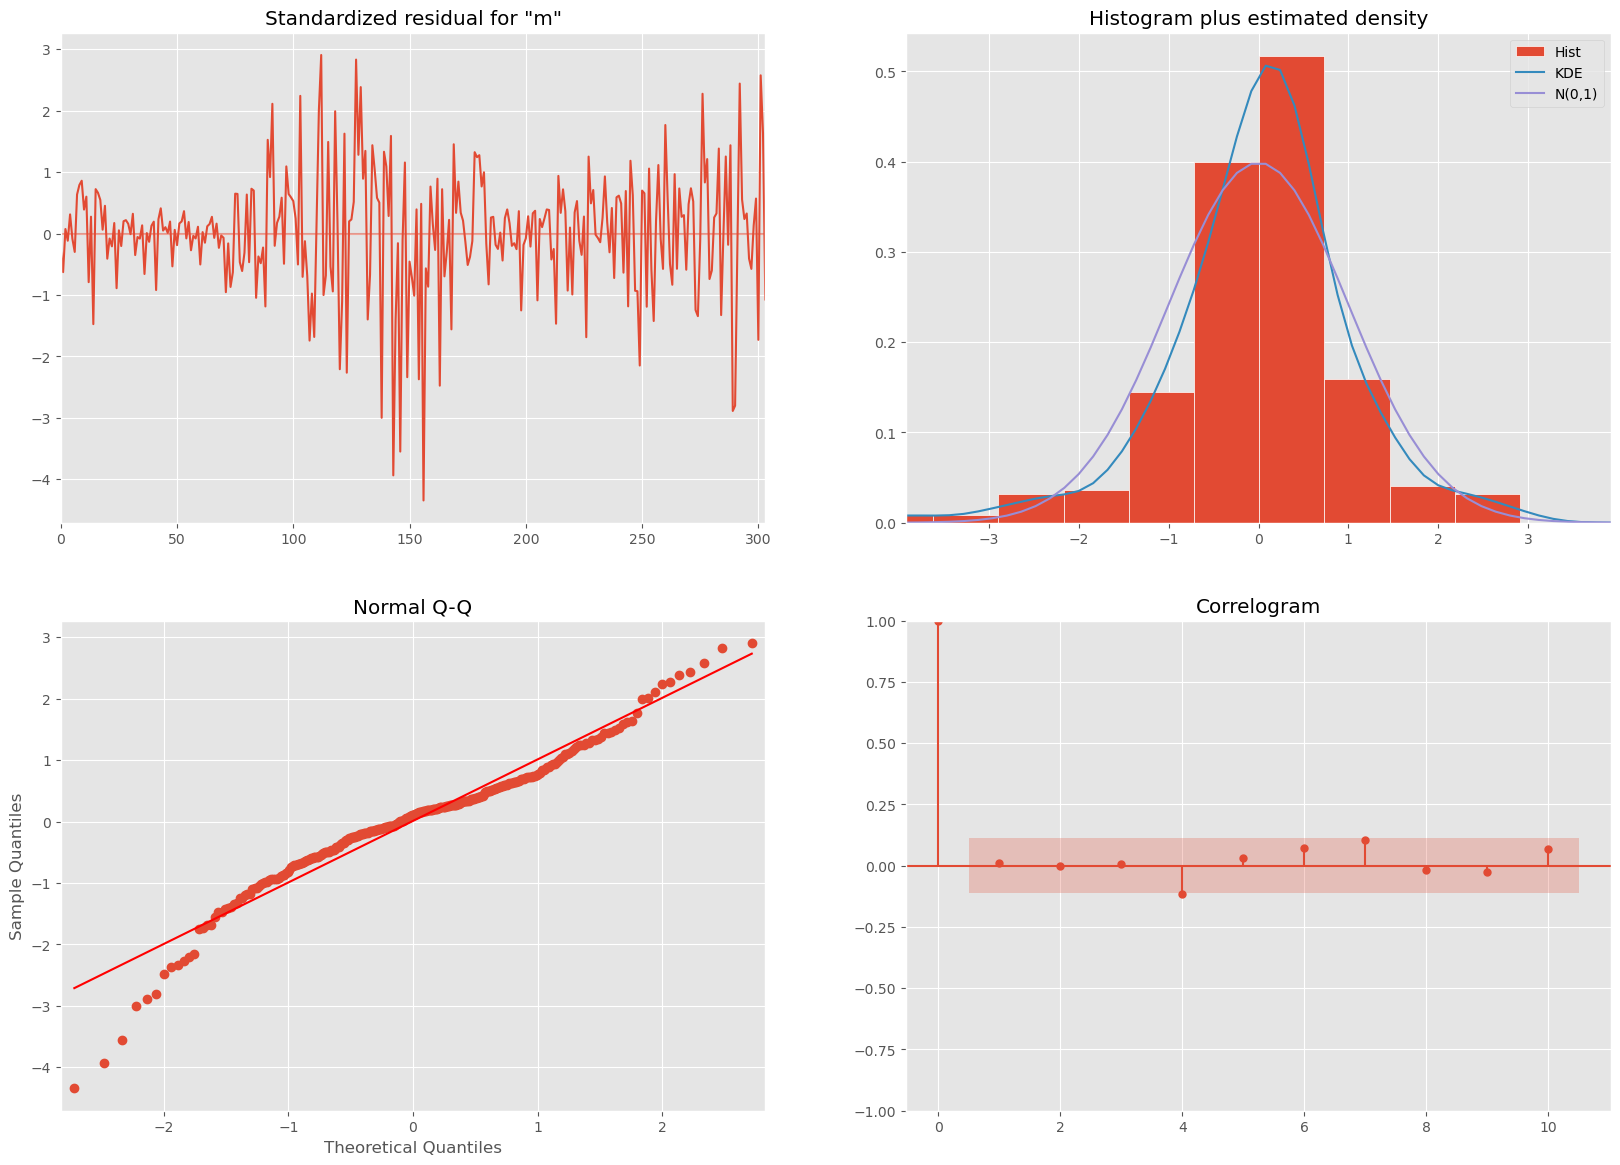

In [79]:
results.plot_diagnostics(figsize=(20,14))
plt.show()

In [80]:
pred0 =results.get_prediction(start='2023-08-02',dynamic=False)
pred0_ci = pred0.conf_int()
#data2 = data.sort_index()
#duplicates = data2[data2.index.duplicated(keep='first')]
#print(data2)
#print(duplicates)
#print(pred0_ci)
pred0_ci

,lower modal_price,upper modal_price
Date,,
2023-08-02,1913.607149,2281.129975
2023-08-03,1955.805212,2323.293596
2023-08-04,1960.810423,2328.284815
2023-08-06,1966.590554,2334.059417
2023-08-07,1993.072274,2360.538971
...,...,...
2023-08-26,2069.650837,2426.359718
2023-08-28,2078.965181,2435.645867
2023-08-31,2012.138736,2368.808460


In [81]:
#2023-09-03
pred1 = results.get_prediction(start='2023-09-03',dynamic=True)
pred1_ci = pred1.conf_int()
#print(pred1_ci)

# True forecasting of out of sample data. In this case the model
# is asked to preict data it has not seen before
#ARIMAResults.get_forecast(steps=1, signal_only=False, **kwargs)
#pred2 = results.get_forecast(1000)
#pred2_ci =pred2.conf_int()
#print(pred2.predicted_mean['2023-10-01':'2023-12-01'])
#print(pred2_ci)
pred1_ci

,lower modal_price,upper modal_price
Date,,
2023-09-03,2053.237413,2417.867745
2023-01-02,2048.758625,2426.026396
2023-01-03,2027.873620,2413.977864
2023-01-05,2014.060465,2422.015501
2023-01-06,2063.273611,2485.194442
...,...,...
2023-08-26,1283.995534,3543.341163
2023-08-28,1294.604141,3562.807521
2023-08-31,1265.016820,3542.256613


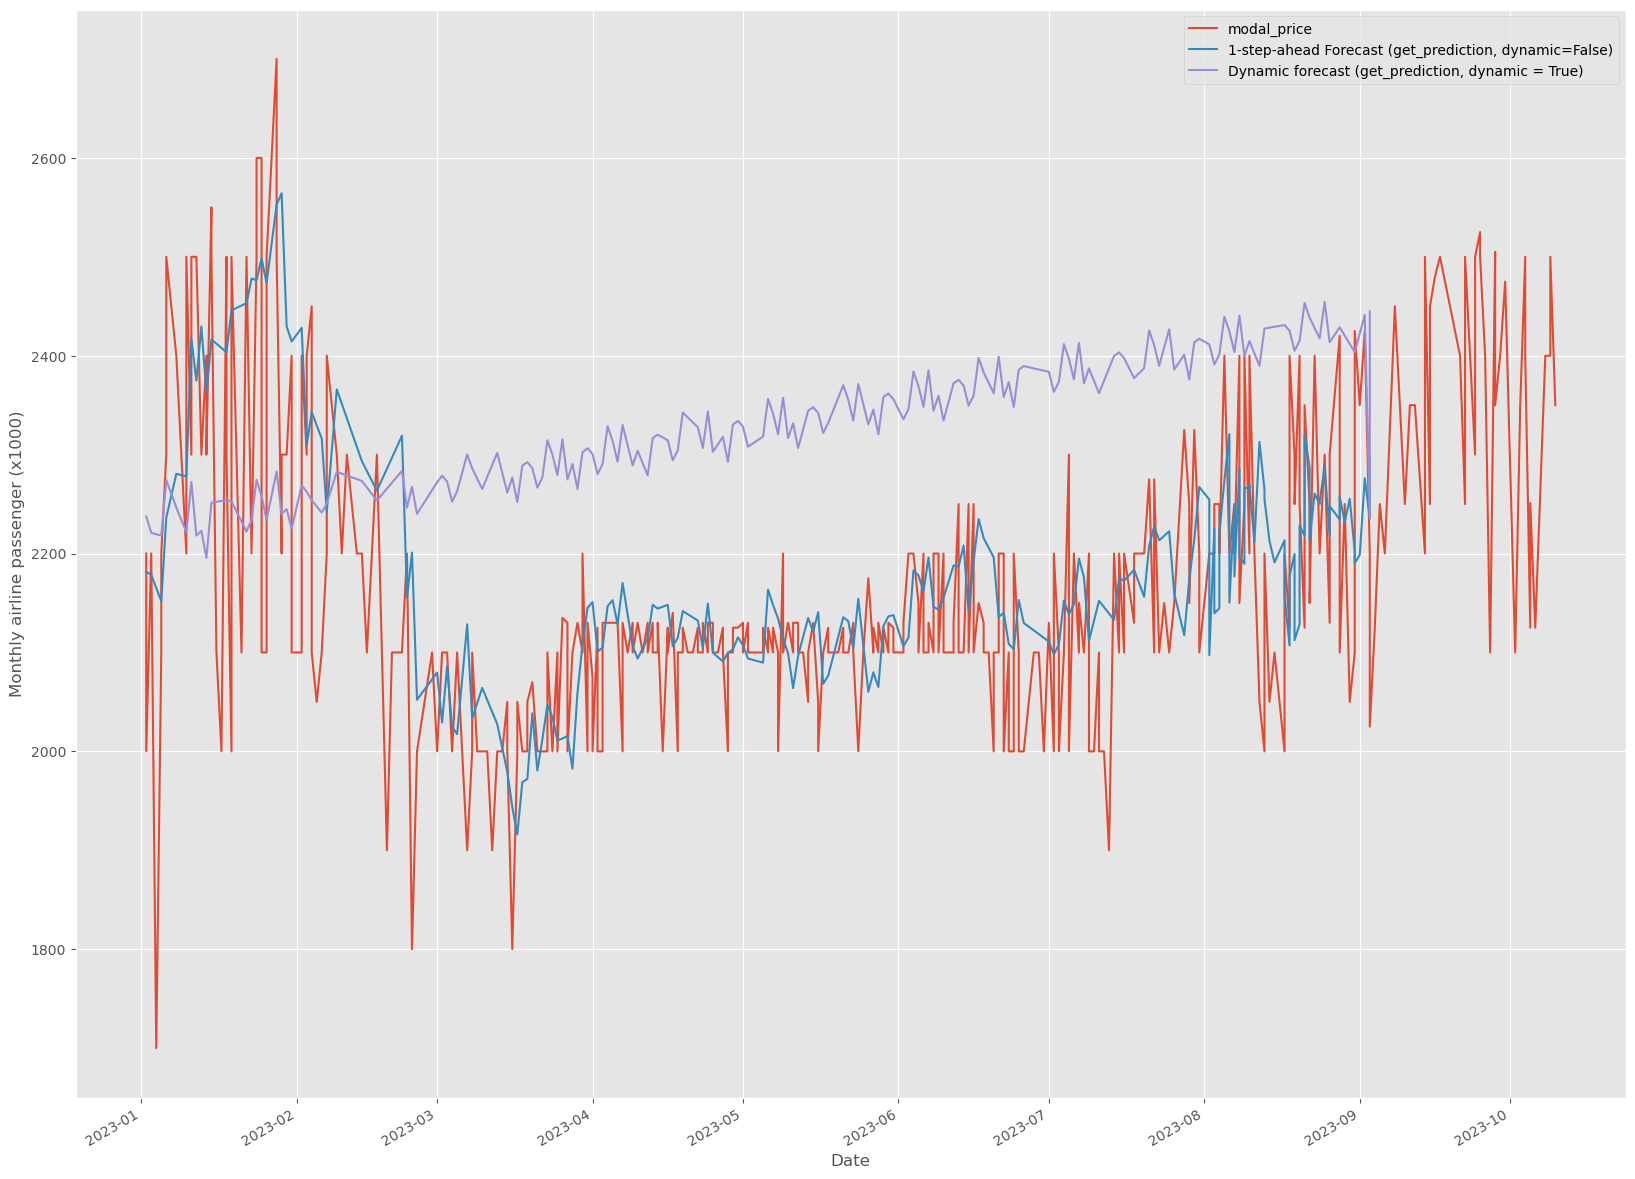

In [82]:
ax = data.plot(figsize=(20,16))
pred0.predicted_mean.plot(ax=ax, label='1-step-ahead Forecast (get_prediction, dynamic=False)')
pred1.predicted_mean.plot(ax=ax, label='Dynamic forecast (get_prediction, dynamic = True)')
#pred2.predicted_mean.plot(ax=ax, label='Dynamic Forecast (get_forecast)')
#ax.fill_between(pred2_ci.index, pred2_ci.iloc[:, 0],pred2_ci.iloc[:, 1], color='k', alpha=.1)
plt.ylabel('Monthly airline passenger (x1000)')
plt.xlabel('Date')
plt.legend()
plt.show()